In [29]:

EXPERIMENT_NAME = "2019-02-08_03-54_3000_iters"

EXPERIMENT_NOTEBOOK_PATH = f"../../reports/experiments/{EXPERIMENT_NAME}/notebook.csv"


In [2]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Load

In [3]:
exp_df = pd.read_csv(EXPERIMENT_NOTEBOOK_PATH)
exp_df.head()

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,sample_no,mean_late_val_acc,epoch
0,0.144,2.248,0.190,2.118,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,1
1,0.227,2.093,0.274,2.047,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,2
2,0.254,2.042,0.243,2.090,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,3
3,0.290,1.946,0.240,2.184,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,4
4,0.323,1.882,0.307,1.922,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,5


## Preprocess

### correct name of reward

In [4]:
exp_df.rename(columns={"mean_late_val_acc":"reward"}, inplace=True)
exp_df.head()

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,sample_no,reward,epoch
0,0.144,2.248,0.190,2.118,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,1
1,0.227,2.093,0.274,2.047,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,2
2,0.254,2.042,0.243,2.090,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,3
3,0.290,1.946,0.240,2.184,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,4
4,0.323,1.882,0.307,1.922,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,5


### add epoch info and accuracy overfit

In [5]:
n_epochs = len(exp_df) / len(exp_df["trial_no"].unique()) / len(exp_df["sample_no"].unique())
exp_df["epoch"] = exp_df.index % n_epochs
exp_df["acc_overfit"] = exp_df["acc"] - exp_df["val_acc"]
exp_df.head()

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,sample_no,reward,epoch,acc_overfit
0,0.144,2.248,0.190,2.118,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,0.0,-0.046
1,0.227,2.093,0.274,2.047,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,1.0,-0.047
2,0.254,2.042,0.243,2.090,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,2.0,0.011
3,0.290,1.946,0.240,2.184,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,3.0,0.050
4,0.323,1.882,0.307,1.922,1,gamma-contrast,0.844,coarse-salt-pepper,0.847,0.624,1,0.395,4.0,0.016


## Some info

In [6]:
print (f"number of trials:{exp_df.trial_no.unique().__len__()}")
print (f"number of samples for each trial:{exp_df.sample_no.unique().__len__()}")

number of trials:3001
number of samples for each trial:1


In [7]:
color_palette = ["red","blue","chocolate","salmon","green","pink","orange",
                 "purple","magenta","sienna","teal","khaki","yellow","darkgreen",
                 "darkblue", "cyan","tan","yellowgreen","tomato","olive",
                 "navy","ivory","brown","azure", '#e6194b', '#3cb44b', '#ffe119', '#4363d8', 
                 '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', 
                 '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
                 '#000075', '#808080', '#ffffff', '#000000']*300

def plot_exp_lines(exp_df, plot=True):
    
    #plt.figure(figsize=(20,10))
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,15))
    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.0)
    
    rowList = []
    for trial_no in exp_df["trial_no"].unique():
        
        if trial_no<1:
            continue
        
        iter_df = exp_df[exp_df["trial_no"]==trial_no].copy()
        
        exp_color = color_palette[trial_no]
        
        if exp_df[exp_df["trial_no"]==trial_no]["portion"].values[0]==0.0:
            exp_color="black"
        
        mean_last_scores = []
        
        if plot==True:
            ############################################################
            # Accuracy plot
            ############################################################
            for sample_id in iter_df["sample_no"].unique():
                sample_df = iter_df[iter_df["sample_no"]==sample_id].copy()
                xs = np.arange(1,51,1)
                axes[0].plot(xs, sample_df["val_acc"], color=exp_color, alpha=0.5, linewidth=2)
                axes[0].plot(xs, sample_df["acc"], '--',color=exp_color, alpha=0.5, linewidth=1)

            axes[0].set_title("validation (straight) and train (dashed) accuracies for child model\n"+\
                      "(each color represents a distinct augmentation strategy) ", fontsize=20)
            axes[0].set_ylabel("accuracy", fontsize=20)

            ############################################################
            # Loss plot
            ############################################################
            for sample_id in iter_df["sample_no"].unique():
                sample_df = iter_df[iter_df["sample_no"]==sample_id].copy()
                xs = np.arange(1,51,1)
                axes[1].plot(xs, sample_df["val_loss"], color=exp_color, alpha=0.5, linewidth=2)
                axes[1].plot(xs, sample_df["loss"], '--',color=exp_color, alpha=0.5, linewidth=1)

            #axes[1].title("validation (straight) and train (dashed) accuracies for child model\n"+\
            #          "(each color represents a distinct augmentation strategy) ", fontsize=20)
            axes[1].set_xlabel("epochs", fontsize=20)
            axes[1].set_ylabel("loss", fontsize=20)
            
        param1 = iter_df["aug1_type"].values[0]
        param2 = iter_df["aug1_magnitude"].values[0]
        param3 = iter_df["aug2_type"].values[0]
        param4 = iter_df["aug2_magnitude"].values[0]
        portion = iter_df["portion"].values[0]
        reward = iter_df["reward"].values[0]
        
        rowList.append([trial_no,param1,param2,param3,param4,portion,reward])
        
    ret_df = pd.DataFrame(rowList, columns=[
        "trial_no","aug1_type","aug1_magnitude", "aug2_type","aug2_magnitude","portion", "reward"]) 
    return ret_df.sort_values("reward", ascending=False)

Total number of trials: 3001


,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,reward
1111,1112,horizontal-flip,0.946,gamma-contrast,0.849,0.968,0.582
1086,1087,horizontal-flip,0.903,gamma-contrast,0.870,0.929,0.573
1175,1176,horizontal-flip,0.962,gamma-contrast,0.942,0.653,0.567
1198,1199,horizontal-flip,0.947,gamma-contrast,0.469,0.899,0.567
59,60,crop,0.897,invert,0.024,0.619,0.564
1067,1068,horizontal-flip,0.951,gamma-contrast,0.417,0.915,0.564
1484,1485,horizontal-flip,0.825,horizontal-flip,0.022,0.661,0.562
499,500,translate-x,0.334,fog,0.462,0.462,0.561
61,62,crop,0.881,emboss,0.060,0.498,0.559
1250,1251,horizontal-flip,0.940,gamma-contrast,0.838,0.902,0.559


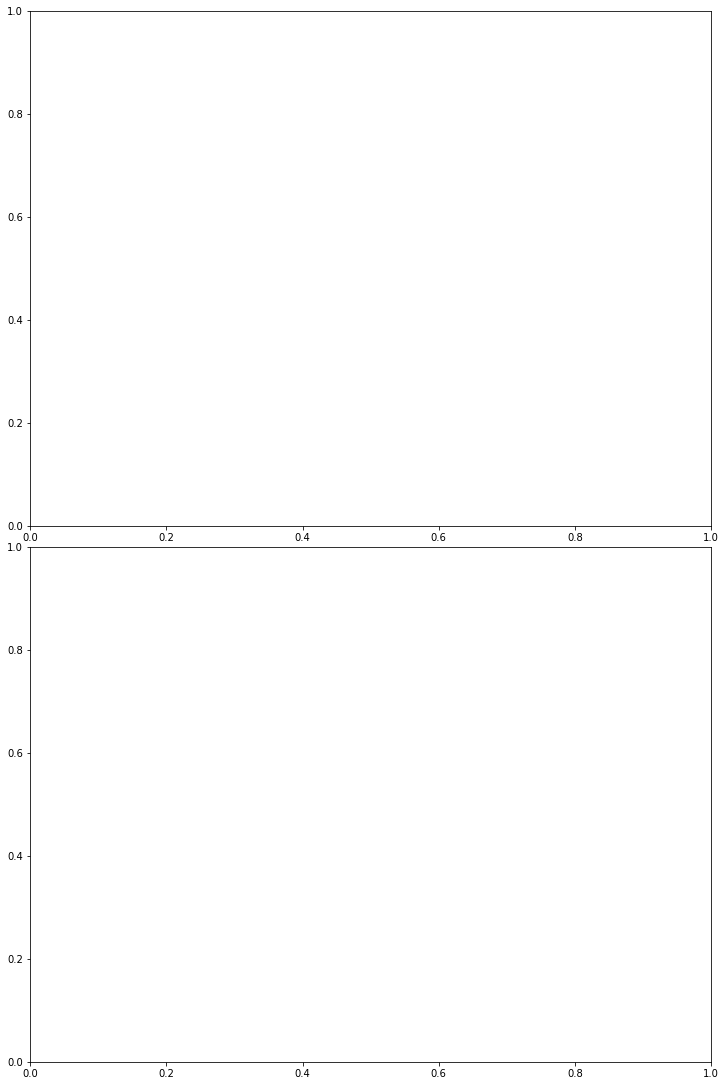

In [8]:
score_df = plot_exp_lines(exp_df, plot=False)
print (f"Total number of trials: {exp_df.trial_no.unique().__len__()}")
score_df[:10]

## Rewards trend

/Users/baris.ozmen/miniconda3/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


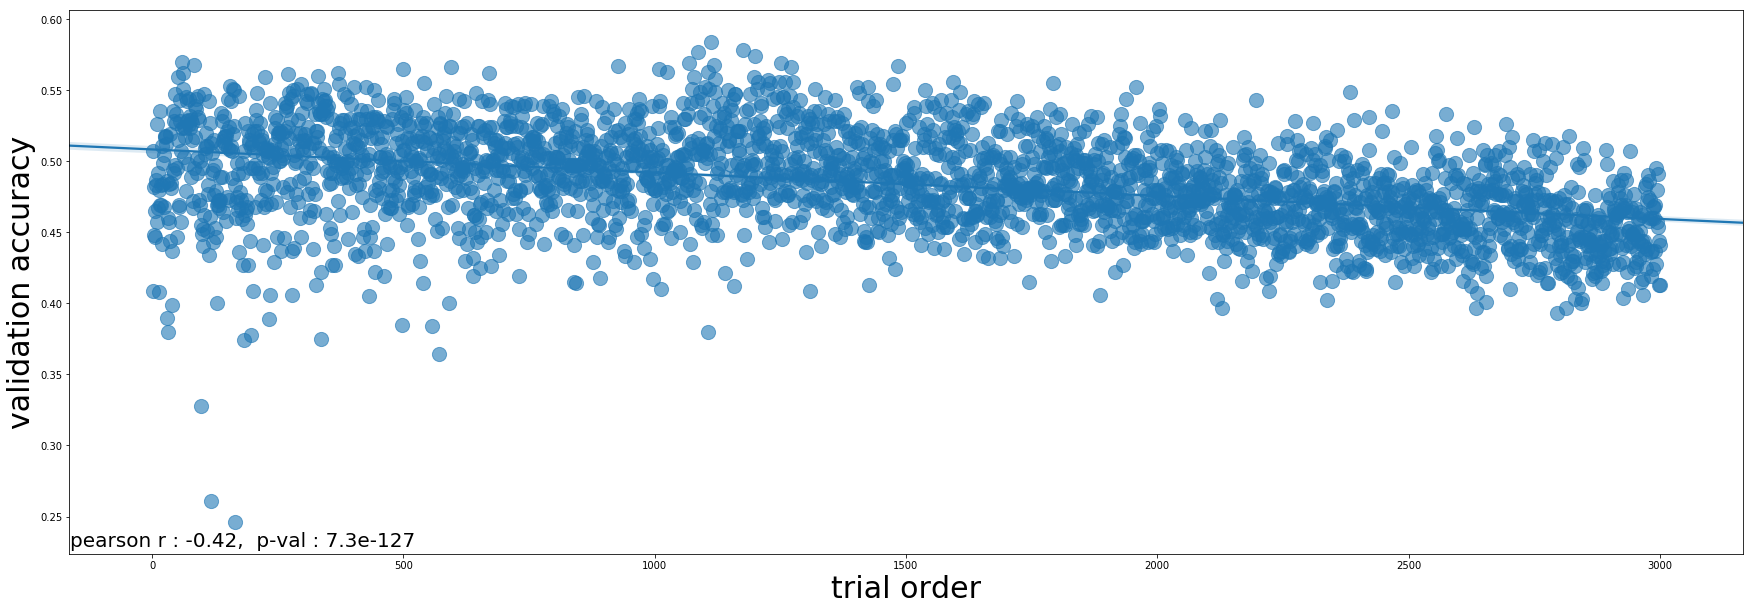

In [9]:
import seaborn as sns

df = (exp_df[exp_df["acc_overfit"]<0.05]
     .sort_values("val_acc", ascending=False)
     .drop_duplicates(["trial_no","sample_no"])
)[["trial_no","val_acc"]]

plt.figure(figsize=(30,10))
for trial_no in df["trial_no"].unique():
    val_accs = df[df["trial_no"]==trial_no]["val_acc"].values
    plt.plot([trial_no, trial_no],[min(val_accs), max(val_accs)], color='black', alpha=0.8)

ax = sns.regplot(x="trial_no", y="val_acc", data=df, scatter_kws={'s':200,'alpha':0.6})

from scipy.stats import pearsonr
r , p = pearsonr(df["trial_no"].values,df["val_acc"].values)

plt.text(plt.xlim()[0]+0.5,plt.ylim()[0]+0.005, f"pearson r : {r:.2},  p-val : {p:.2}", fontsize=20)

plt.xlabel("trial order", fontsize=30)
plt.ylabel("validation accuracy", fontsize=30)

del df

## How frequency of augmented images affect accuracy?

Text(0, 0.5, 'val_acc')

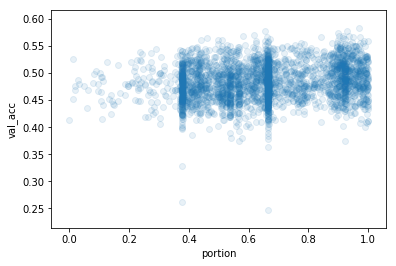

In [10]:
df = (exp_df[exp_df["acc_overfit"]<0.05]
         .sort_values("val_acc", ascending=False)
         .drop_duplicates(["trial_no","sample_no"])
     )[["portion","val_acc"]]

plt.scatter(df["portion"], df["val_acc"], alpha=0.1)
plt.xlabel("portion")
plt.ylabel("val_acc")

In [11]:
from scipy.stats import pearsonr

pearsonr(df["portion"], df["val_acc"])

(0.1729567444881104, 1.3894153930879943e-21)

In [12]:
exp_df.drop_duplicates("trial_no")["portion"].unique().__len__()

690

# Top 5 policy accuracy curves (they're overfitting for augmentation)

,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,reward
2,1112,horizontal-flip,0.946,gamma-contrast,0.849,0.968,0.582
1,1087,horizontal-flip,0.903,gamma-contrast,0.870,0.929,0.573
3,1176,horizontal-flip,0.962,gamma-contrast,0.942,0.653,0.567
4,1199,horizontal-flip,0.947,gamma-contrast,0.469,0.899,0.567
0,60,crop,0.897,invert,0.024,0.619,0.564


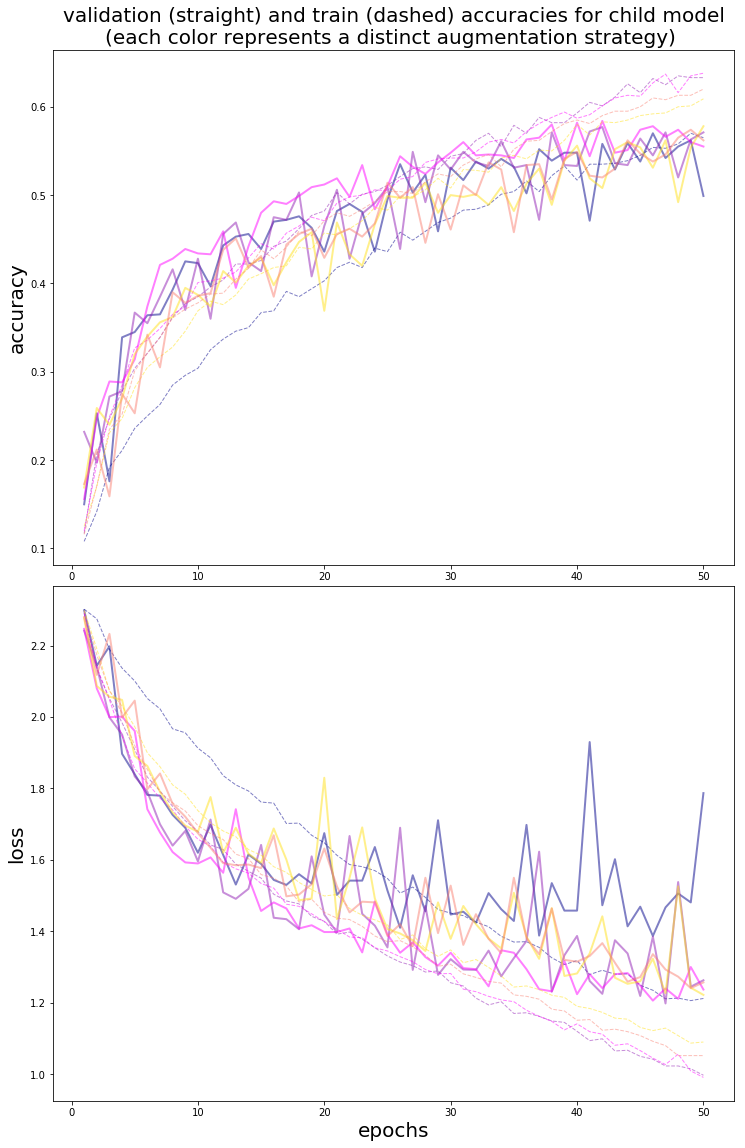

In [13]:
top_policy_trial_no_arr = score_df[:5].trial_no.values
plot_exp_lines(exp_df[exp_df["trial_no"].isin(top_policy_trial_no_arr)])

# Bottom 5 policy accuracy curves

,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,reward
4,336,horizontal-flip,0.516,shear,0.207,0.921,0.322
3,197,brighten,0.295,shear,0.186,0.665,0.319
2,182,dropout,0.335,shear,0.051,0.569,0.316
0,118,rotate,0.334,shear,0.286,0.378,0.182
1,165,shear,0.340,shear,0.207,0.665,0.182


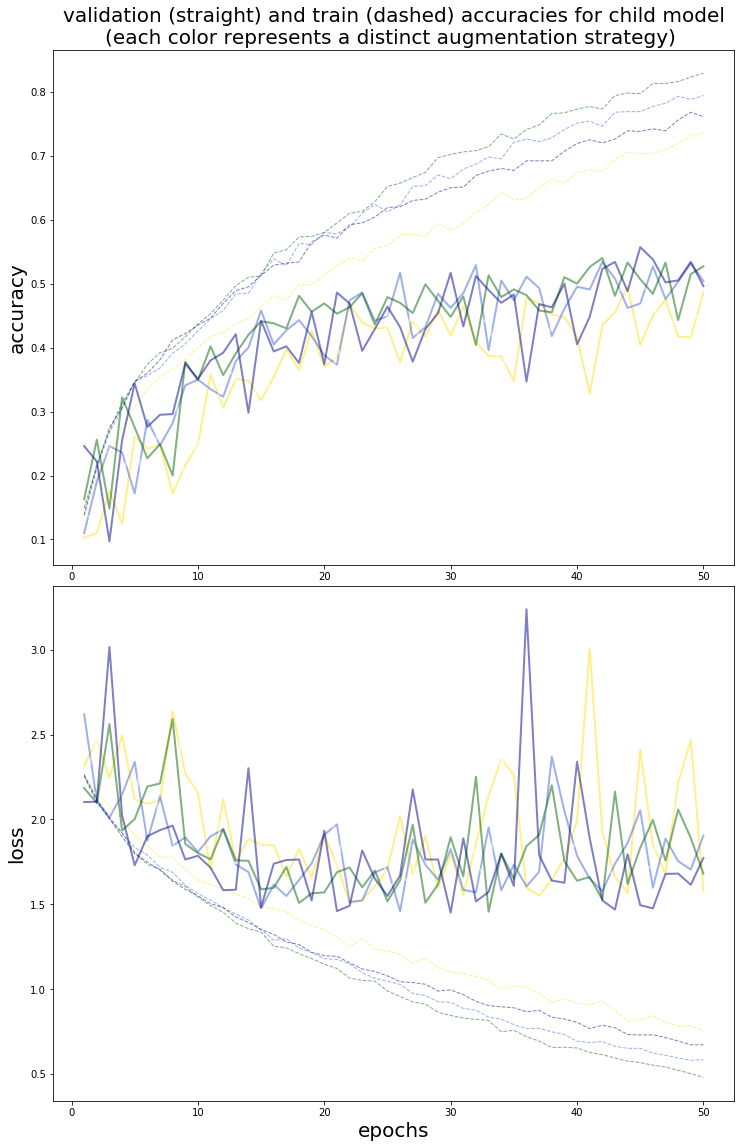

In [14]:
worst_policy_trial_no_arr = score_df[-5:].trial_no.values
plot_exp_lines(exp_df[exp_df["trial_no"].isin(worst_policy_trial_no_arr)])

In [15]:
import sys
sys.path.insert(0,"../../")

from deepaugment.augmenter import Augmenter
augmenter=Augmenter()

In [16]:
from PIL import Image

from imgaug import augmenters as iaa

import sys
sys.path.insert(0,"../../")
from deepaugment.build_features import DataOp

Using TensorFlow backend.


In [17]:
data, input_shape = DataOp.load("cifar10",1000)
data = DataOp.preprocess(data)

Using 1000 training images


In [18]:
def display_images(X, nrows=2, ncols=4):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10,nrows*10))
    fig.tight_layout()

    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        axes[int(i/ncols)][i%ncols].imshow(im_arr)
        
def display_images_comperatively(X,X_aug,nrows=2, ncols=4):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10,nrows*10))
    fig.tight_layout()

    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        if i%2==0:
            axes[int(i/ncols)][i%ncols].imshow(X[i])
            axes[int((i+1)/ncols)][(i+1)%ncols].imshow(X_aug[i])

            
def display_augmentation_by_trial_no(trial_no, exp_df, data, nrows=2, ncols=4):
    trial_df = exp_df[exp_df["trial_no"]==trial_no]
    trial_hyperparams = [trial_df.iloc[0,5],trial_df.iloc[0,6],
                         trial_df.iloc[0,7],trial_df.iloc[0,8],
                         1.0] # proportion always 1

    aug_data = augmenter.run(data["X_train"], data["y_train"],*trial_hyperparams)

    print (trial_hyperparams)
    display_images_comperatively(data["X_train"], aug_data["X_train"], nrows, ncols)
    
def display_augmentation_by_steps(trial_no, df, data, nrows=4):
    from deepaugment.augmenter import transform
    trial_df = df[df["trial_no"]==trial_no]
    
    hyperparams = [trial_df.iloc[0,5],trial_df.iloc[0,6],
                   trial_df.iloc[0,7],trial_df.iloc[0,8],
                   1.0] # proportion always 1
    
    print ("hyperparams:",hyperparams)
    
    X = data["X_train"]
    X_aug_1 = transform(hyperparams[0], hyperparams[1], X)
    X_aug_2 = transform(hyperparams[2], hyperparams[3], X_aug_1)
    
    ncols=4
    fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(ncols*10,nrows*10))
    fig.tight_layout()
    fig.suptitle("smt")
    
    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        if i%4==0:
            axes[int(i/ncols)][i%ncols].imshow(X[i])
            axes[int((i+1)/ncols)][(i+1)%ncols].imshow(X_aug_1[i])
            axes[int((i+2)/ncols)][(i+2)%ncols].imshow(X_aug_2[i])
    


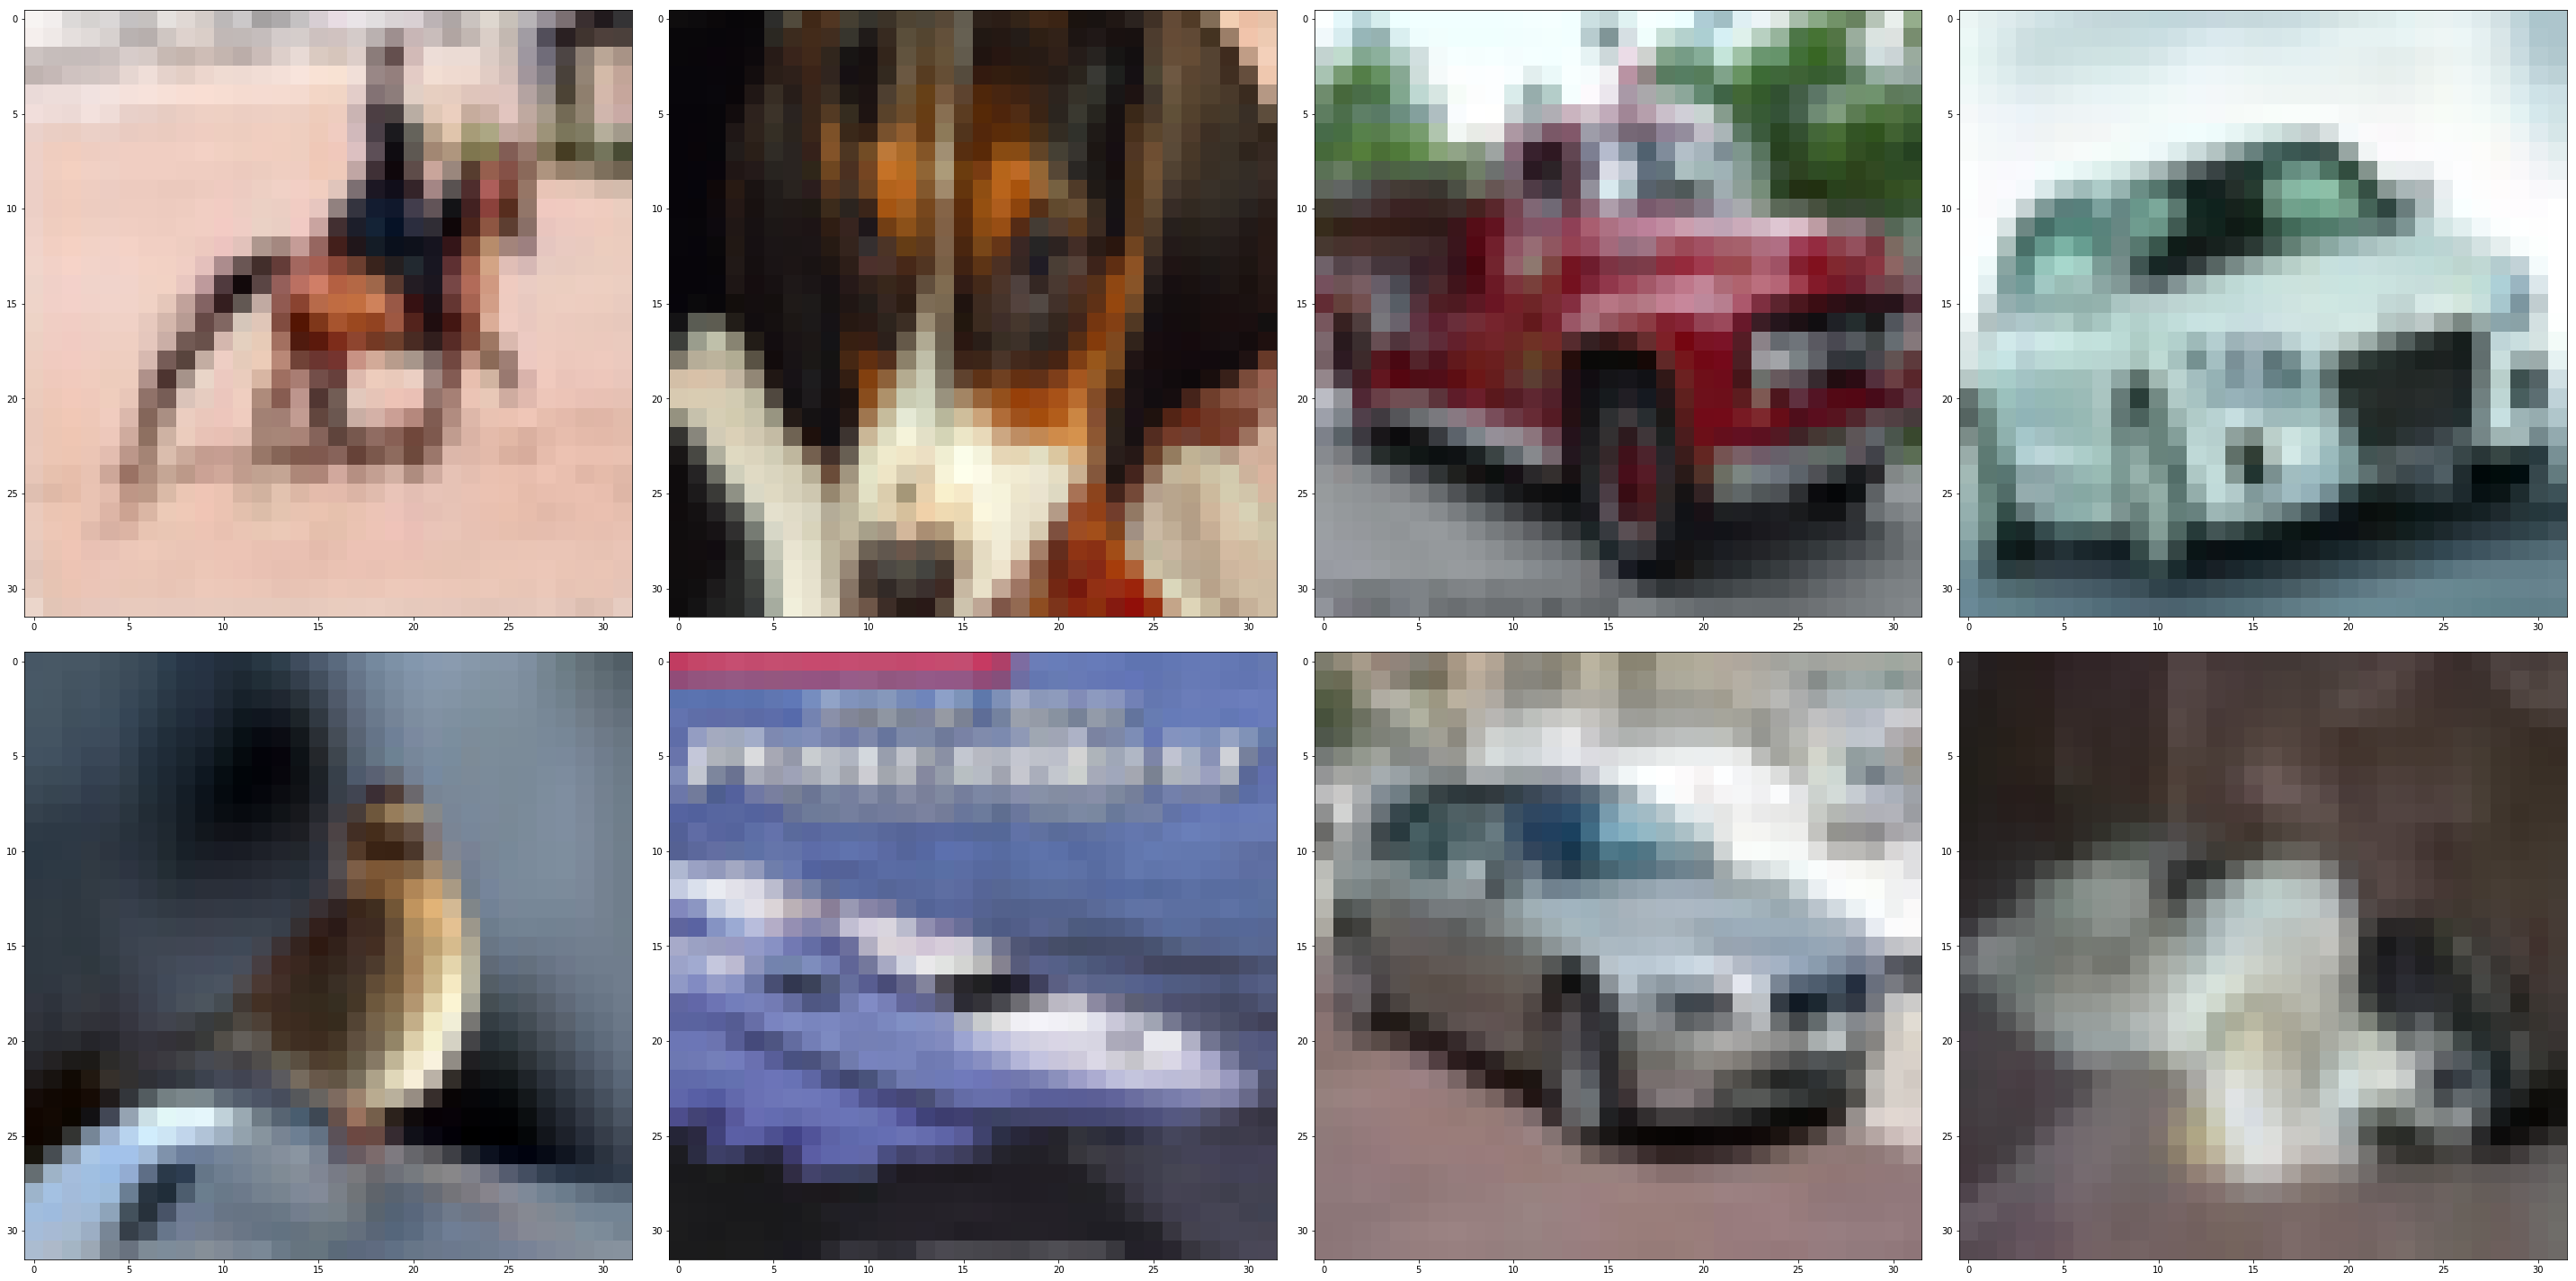

In [19]:
display_images(data["X_train"])

['dropout', 0.8009999999999999, 'coarse-dropout', 0.679, 1.0]


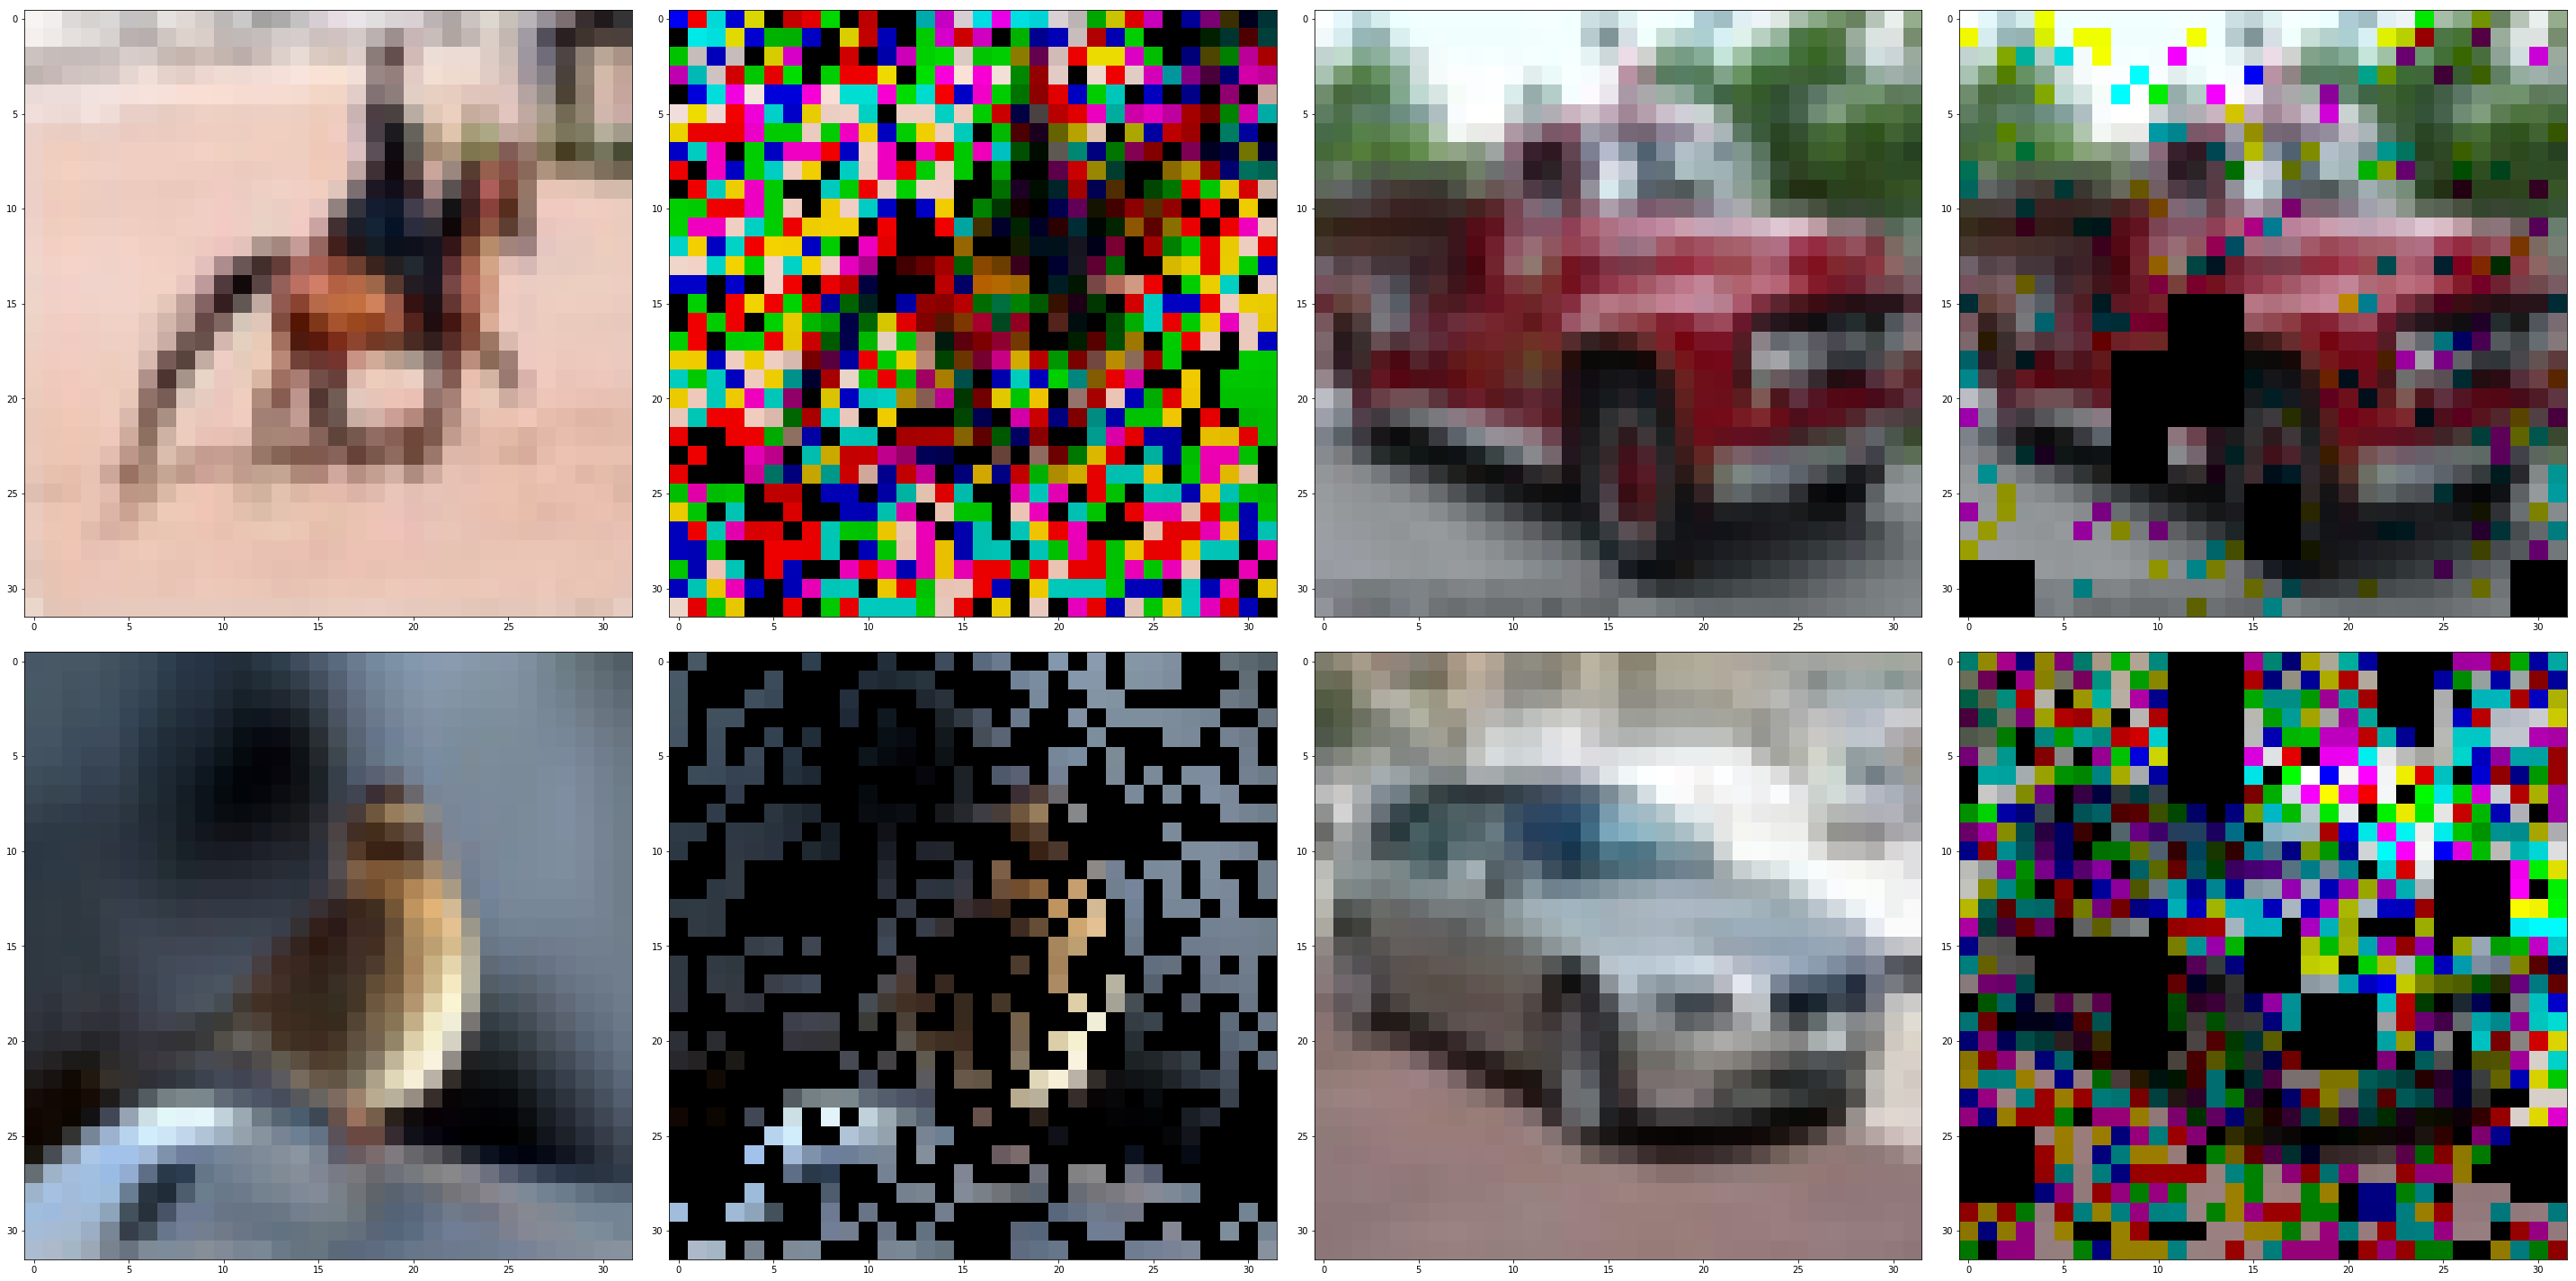

In [20]:
display_augmentation_by_trial_no(5, exp_df, data)

# Overfitting augmentations

1112
['horizontal-flip', 0.946, 'gamma-contrast', 0.8490000000000001, 1.0]
1087
['horizontal-flip', 0.903, 'gamma-contrast', 0.87, 1.0]
1176
['horizontal-flip', 0.9620000000000001, 'gamma-contrast', 0.9420000000000001, 1.0]
1199
['horizontal-flip', 0.9470000000000001, 'gamma-contrast', 0.469, 1.0]
60
['crop', 0.897, 'invert', 0.024, 1.0]


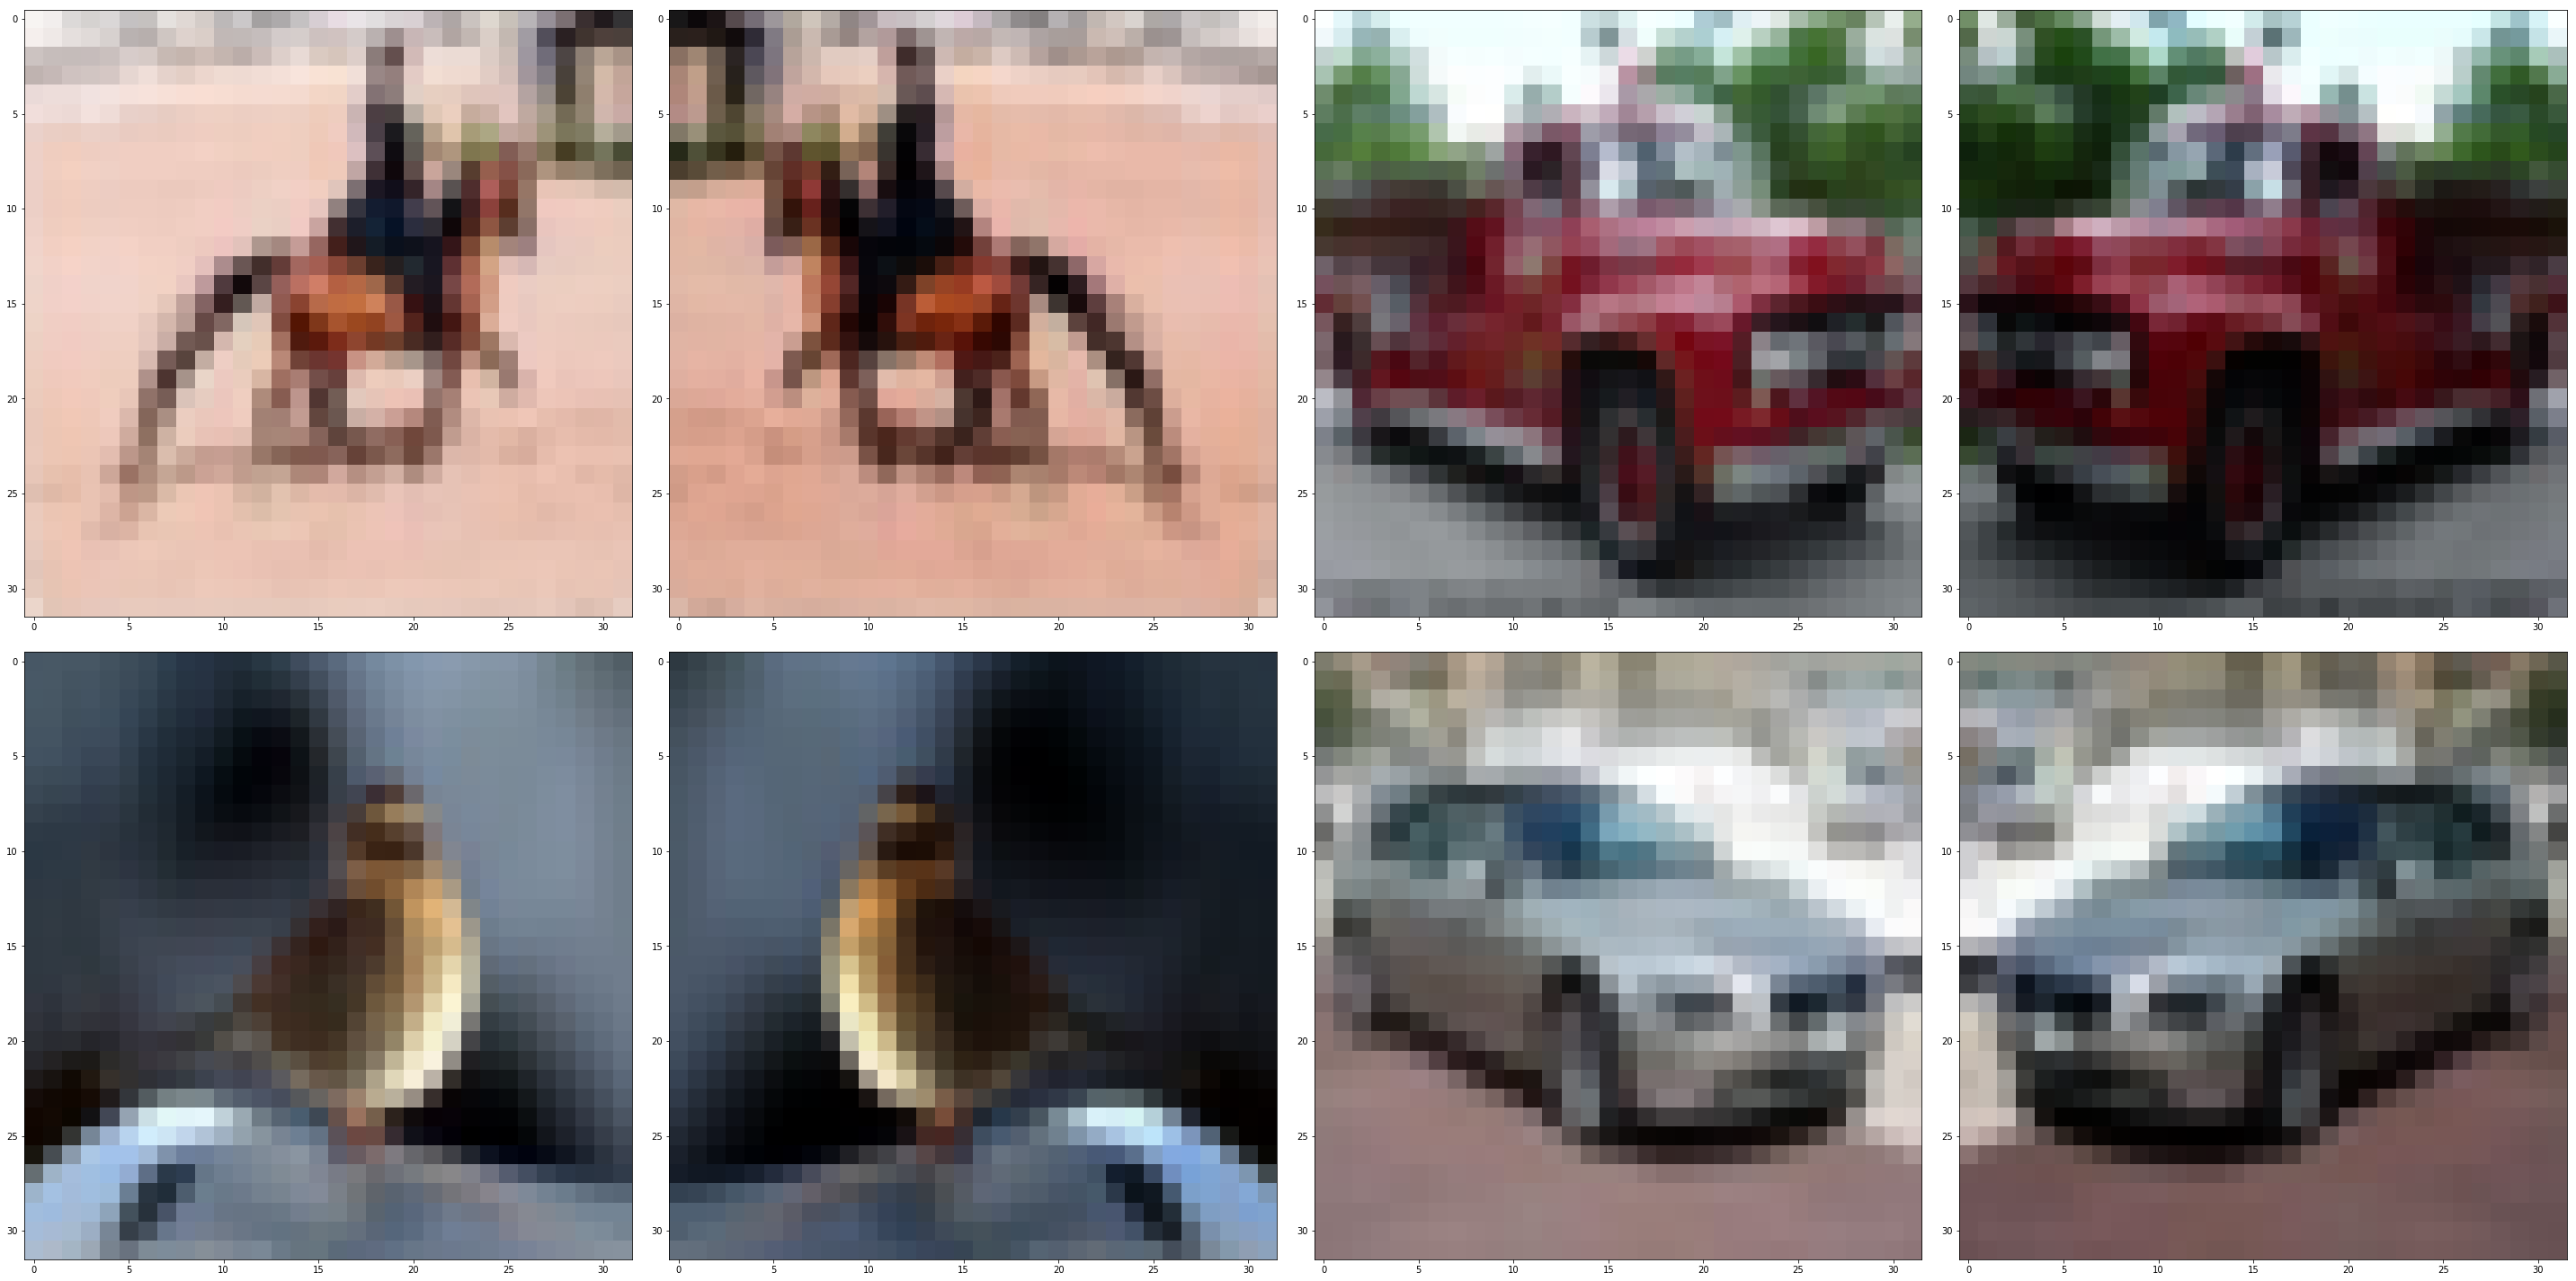

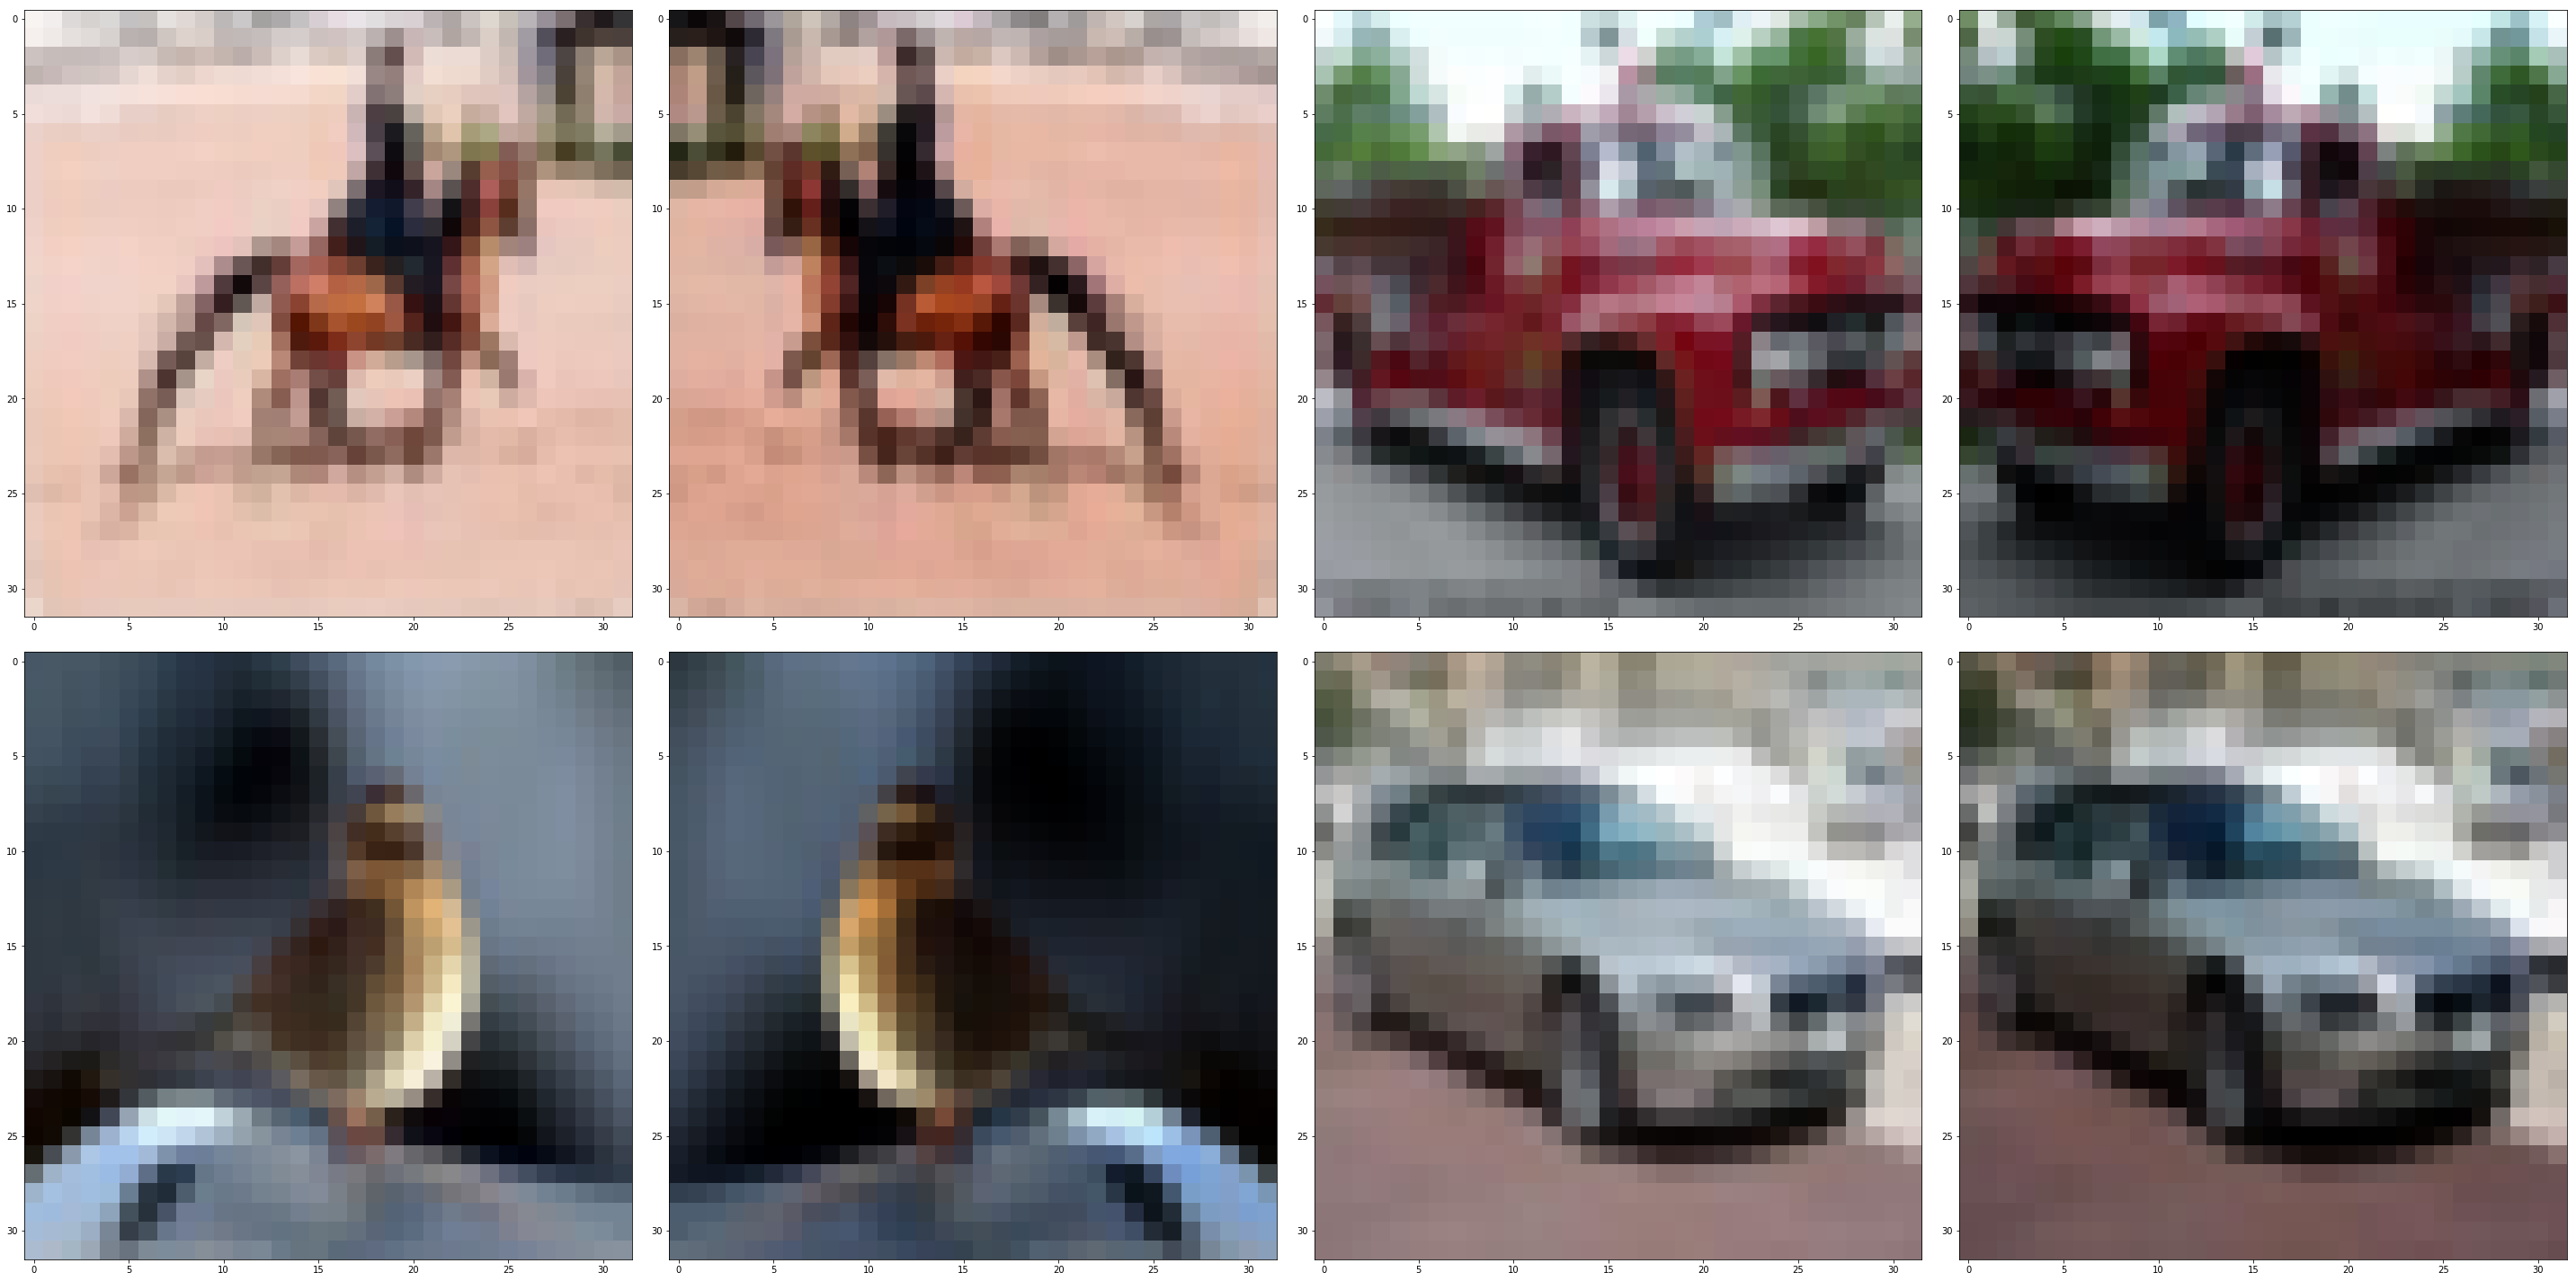

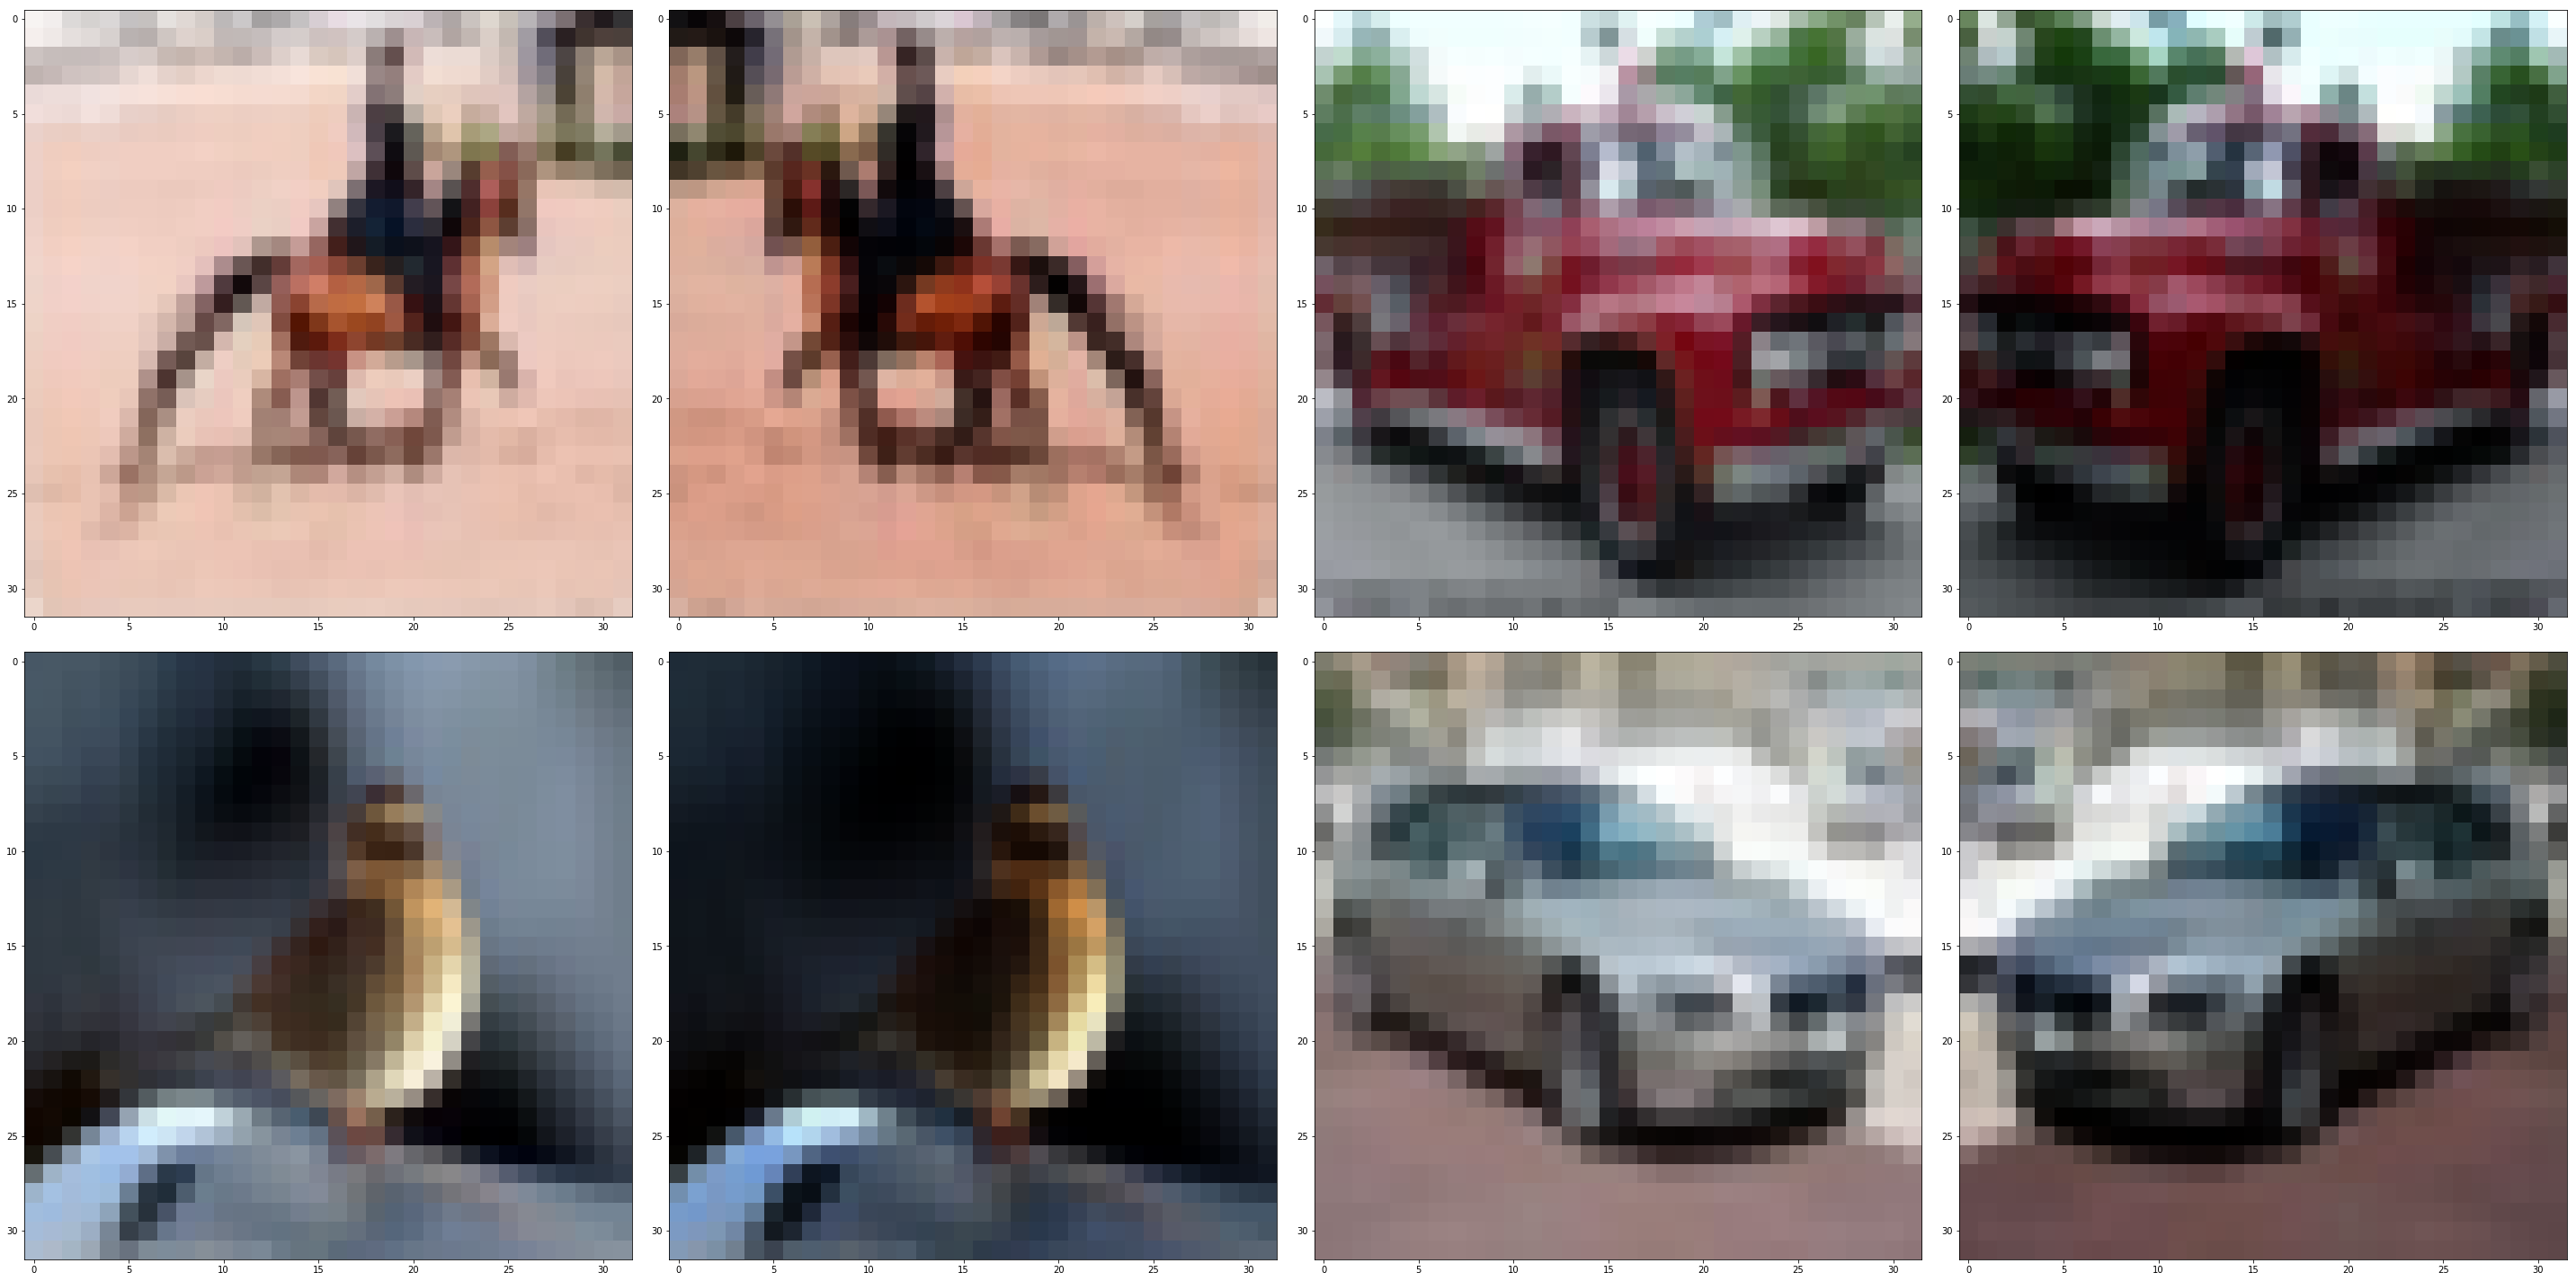

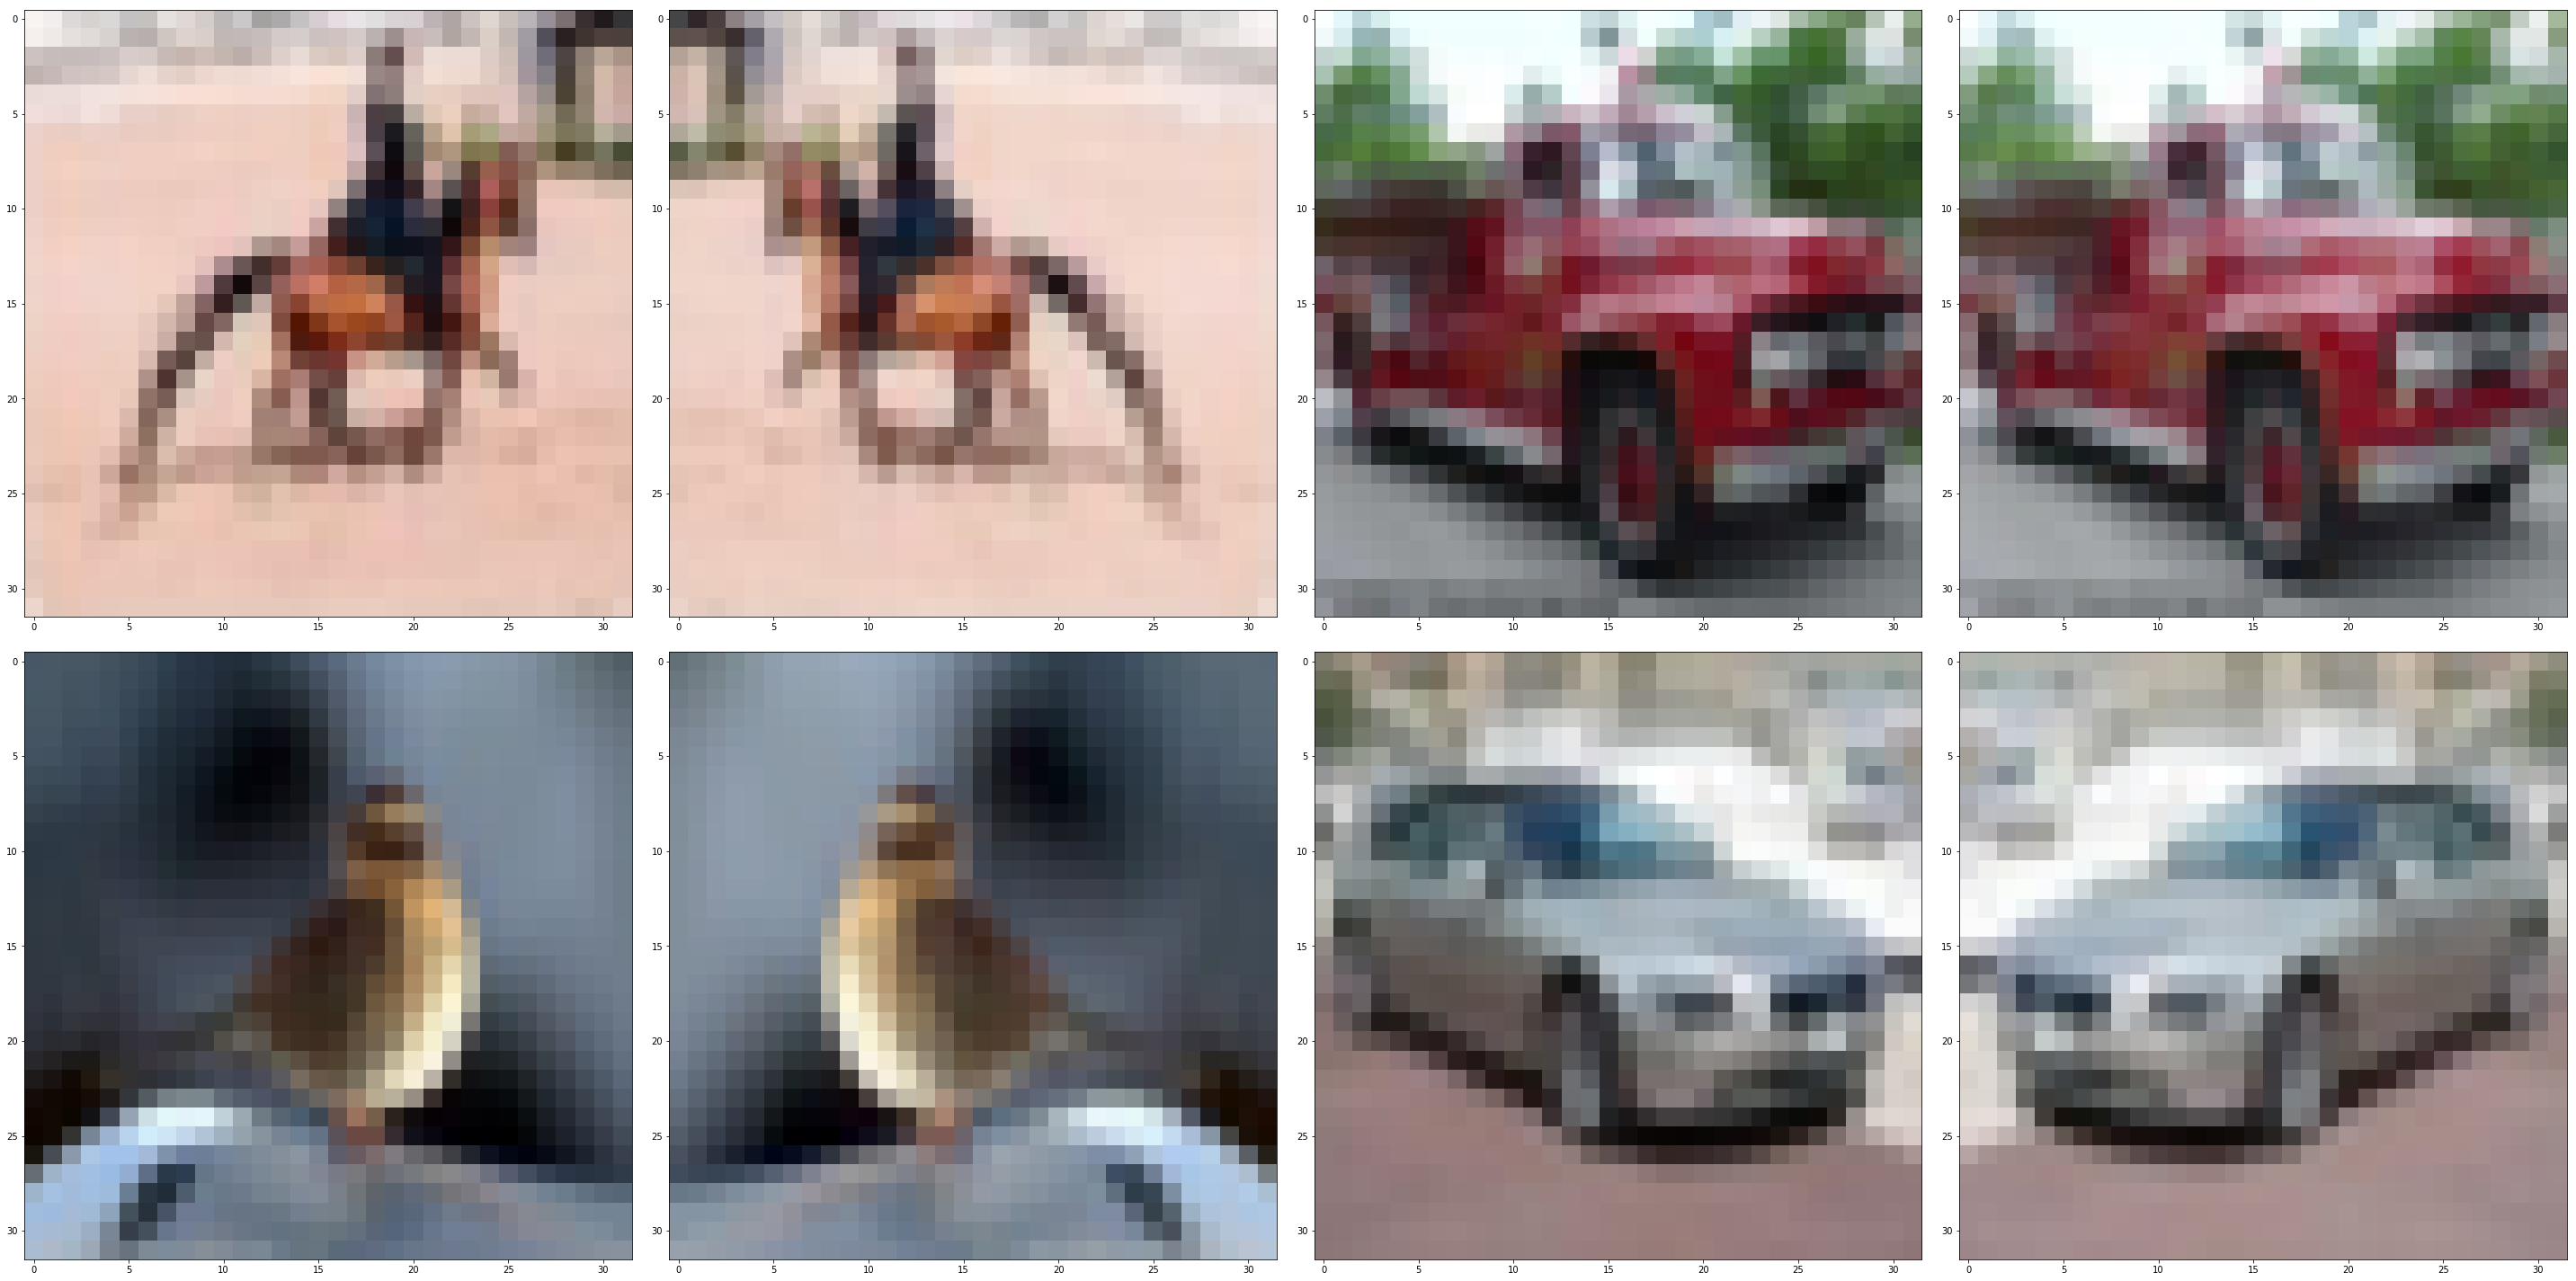

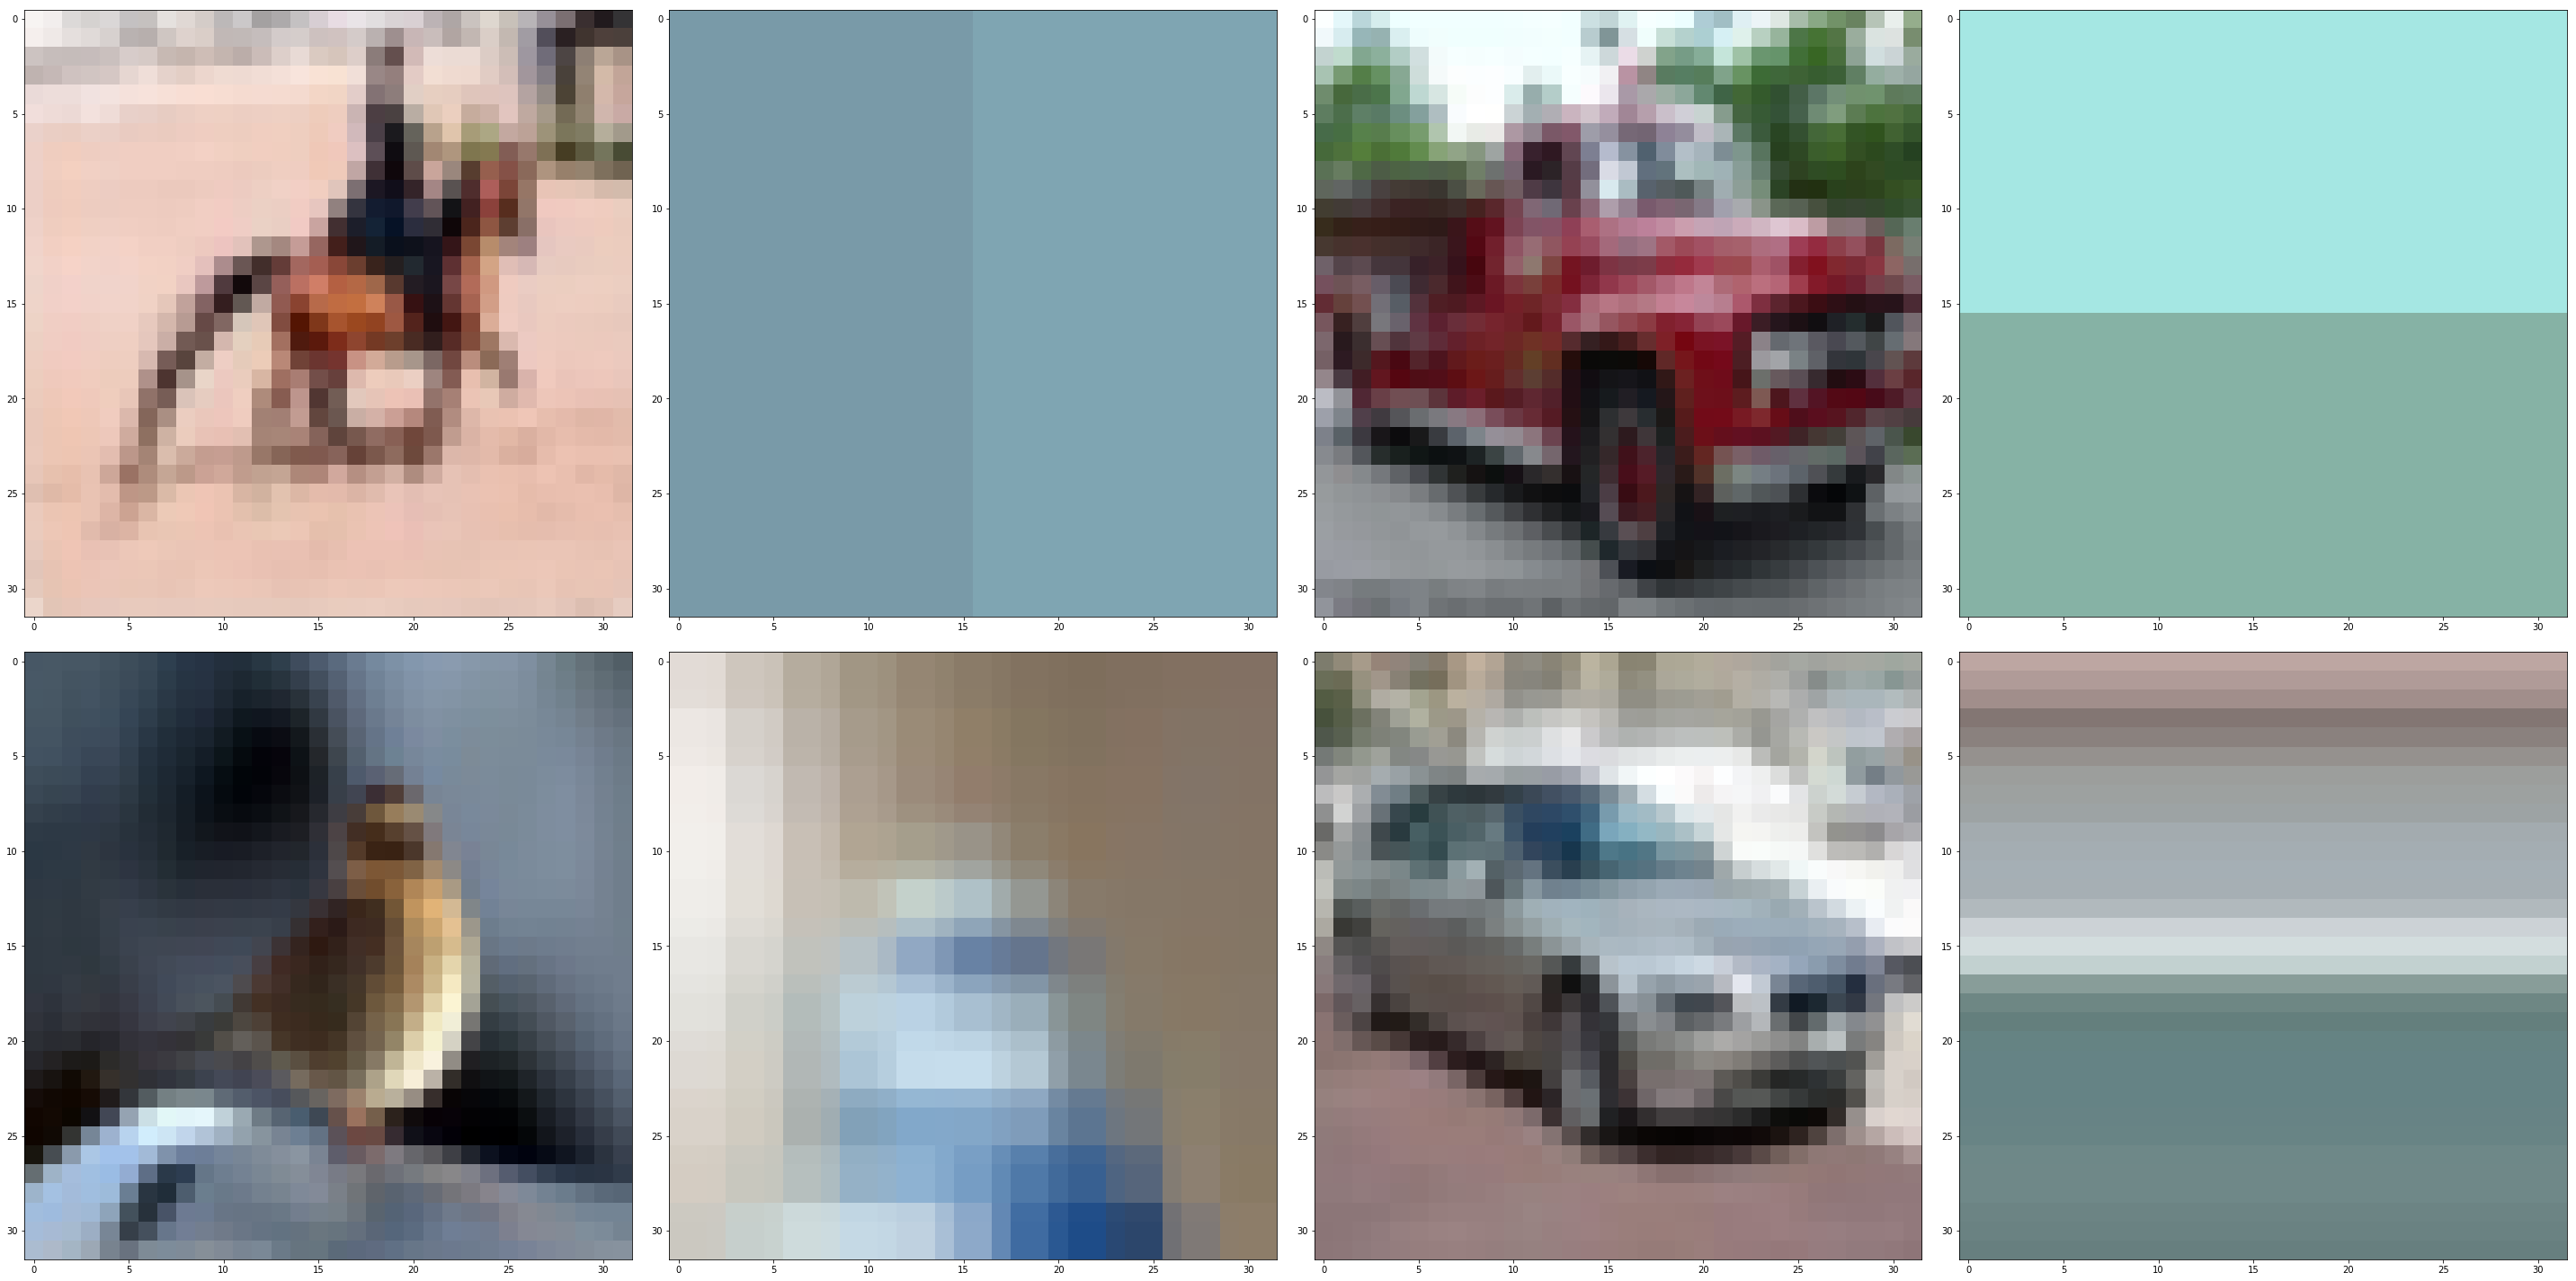

In [21]:
for i in top_policy_trial_no_arr:
    print (i)
    display_augmentation_by_trial_no(i, exp_df, data)

# Non-overfitting augmentations

In [22]:
acc_overfit_by_trial = exp_df[exp_df["epoch"]<20].groupby("trial_no").sum()["acc_overfit"]

# if acc_overfit is negative, that means validation is more accurate than training, so augmentation overfits
modified_exp_df = pd.merge(
    exp_df, 
    pd.DataFrame(acc_overfit_by_trial).reset_index().rename(columns={"acc_overfit":"total_acc_overfit"}),
    on="trial_no",
    how="left"
)

non_overfitting_exp_df = modified_exp_df[modified_exp_df["total_acc_overfit"]>0]

trial_no: 1229
hyperparams: ['horizontal-flip', 0.9470000000000001, 'translate-y', 0.20600000000000002, 1.0]
trial_no: 1608
hyperparams: ['horizontal-flip', 0.9359999999999999, 'brighten', 0.233, 1.0]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


trial_no: 1537
hyperparams: ['horizontal-flip', 0.897, 'gamma-contrast', 0.5429999999999999, 1.0]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


trial_no: 859
hyperparams: ['gaussian-blur', 1.0, 'brighten', 0.026000000000000002, 1.0]
trial_no: 1244
hyperparams: ['horizontal-flip', 0.889, 'gamma-contrast', 0.47200000000000003, 1.0]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


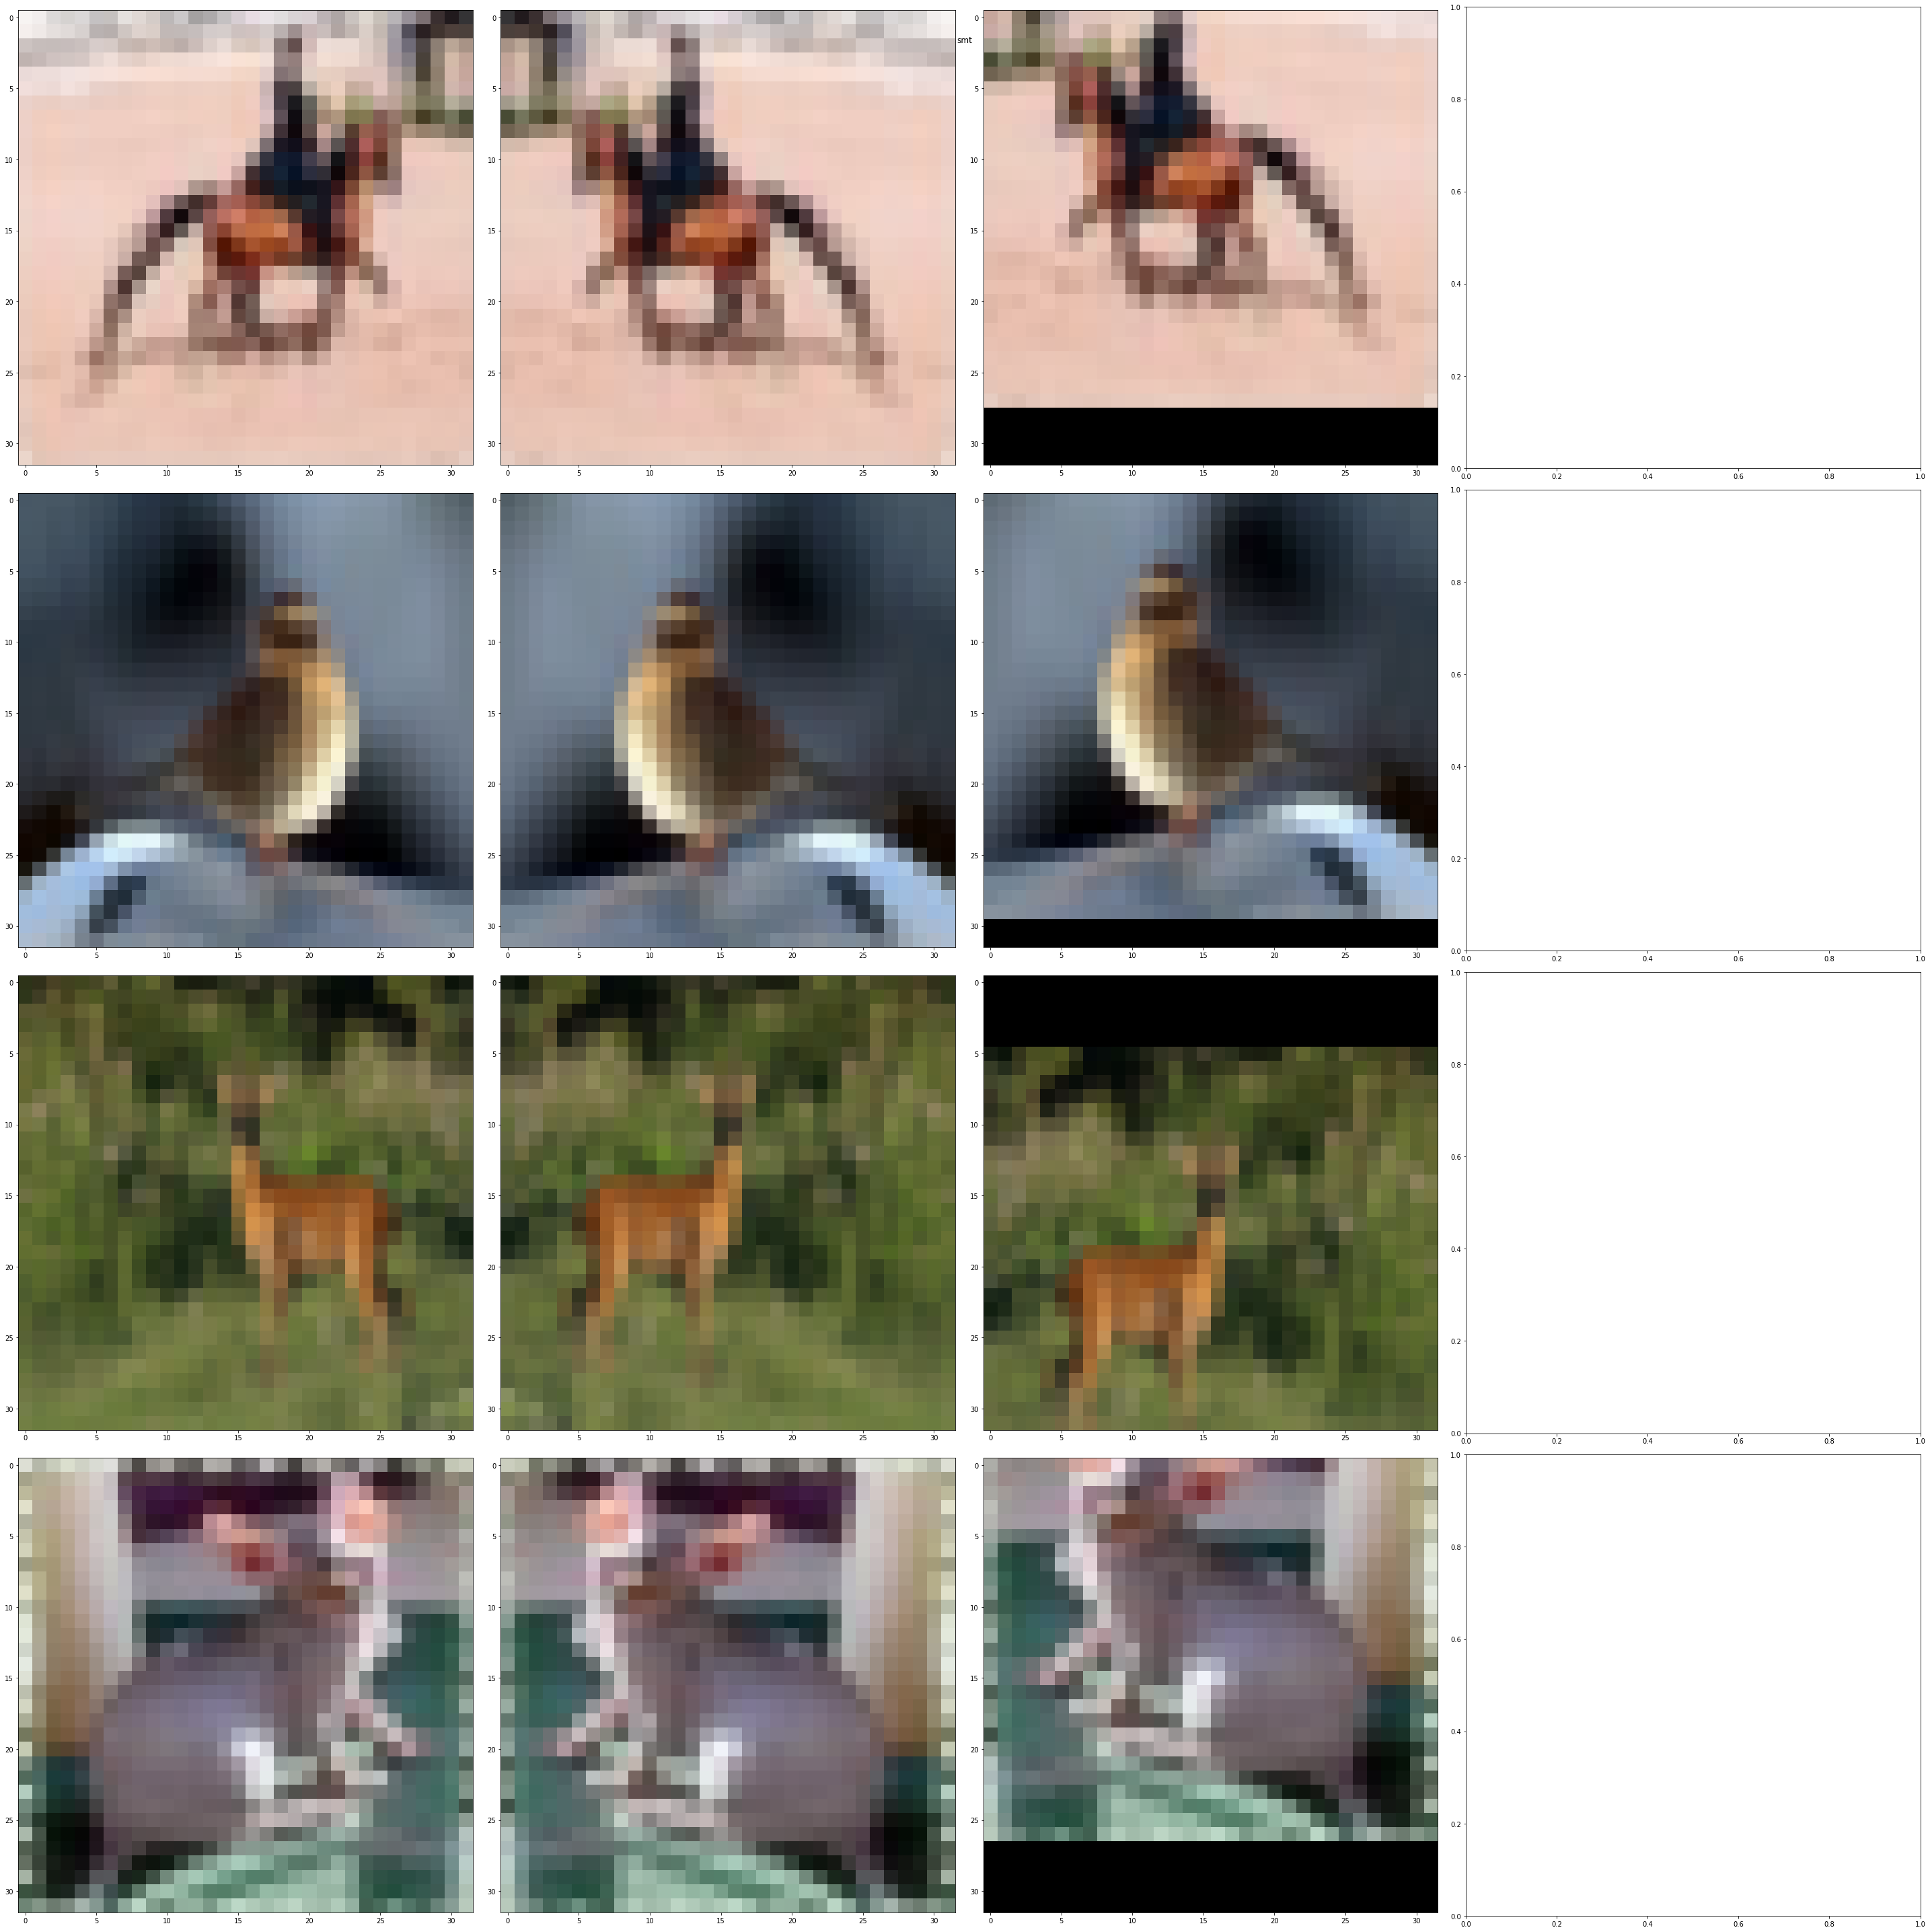

<Figure size 144x144 with 0 Axes>

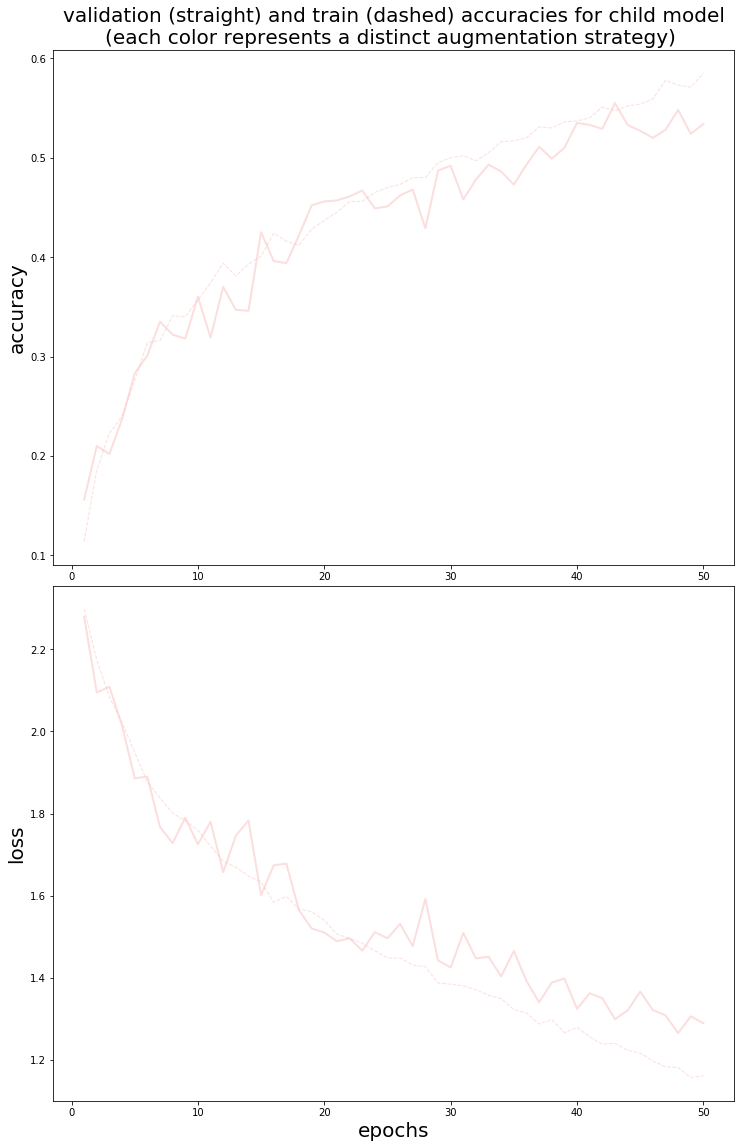

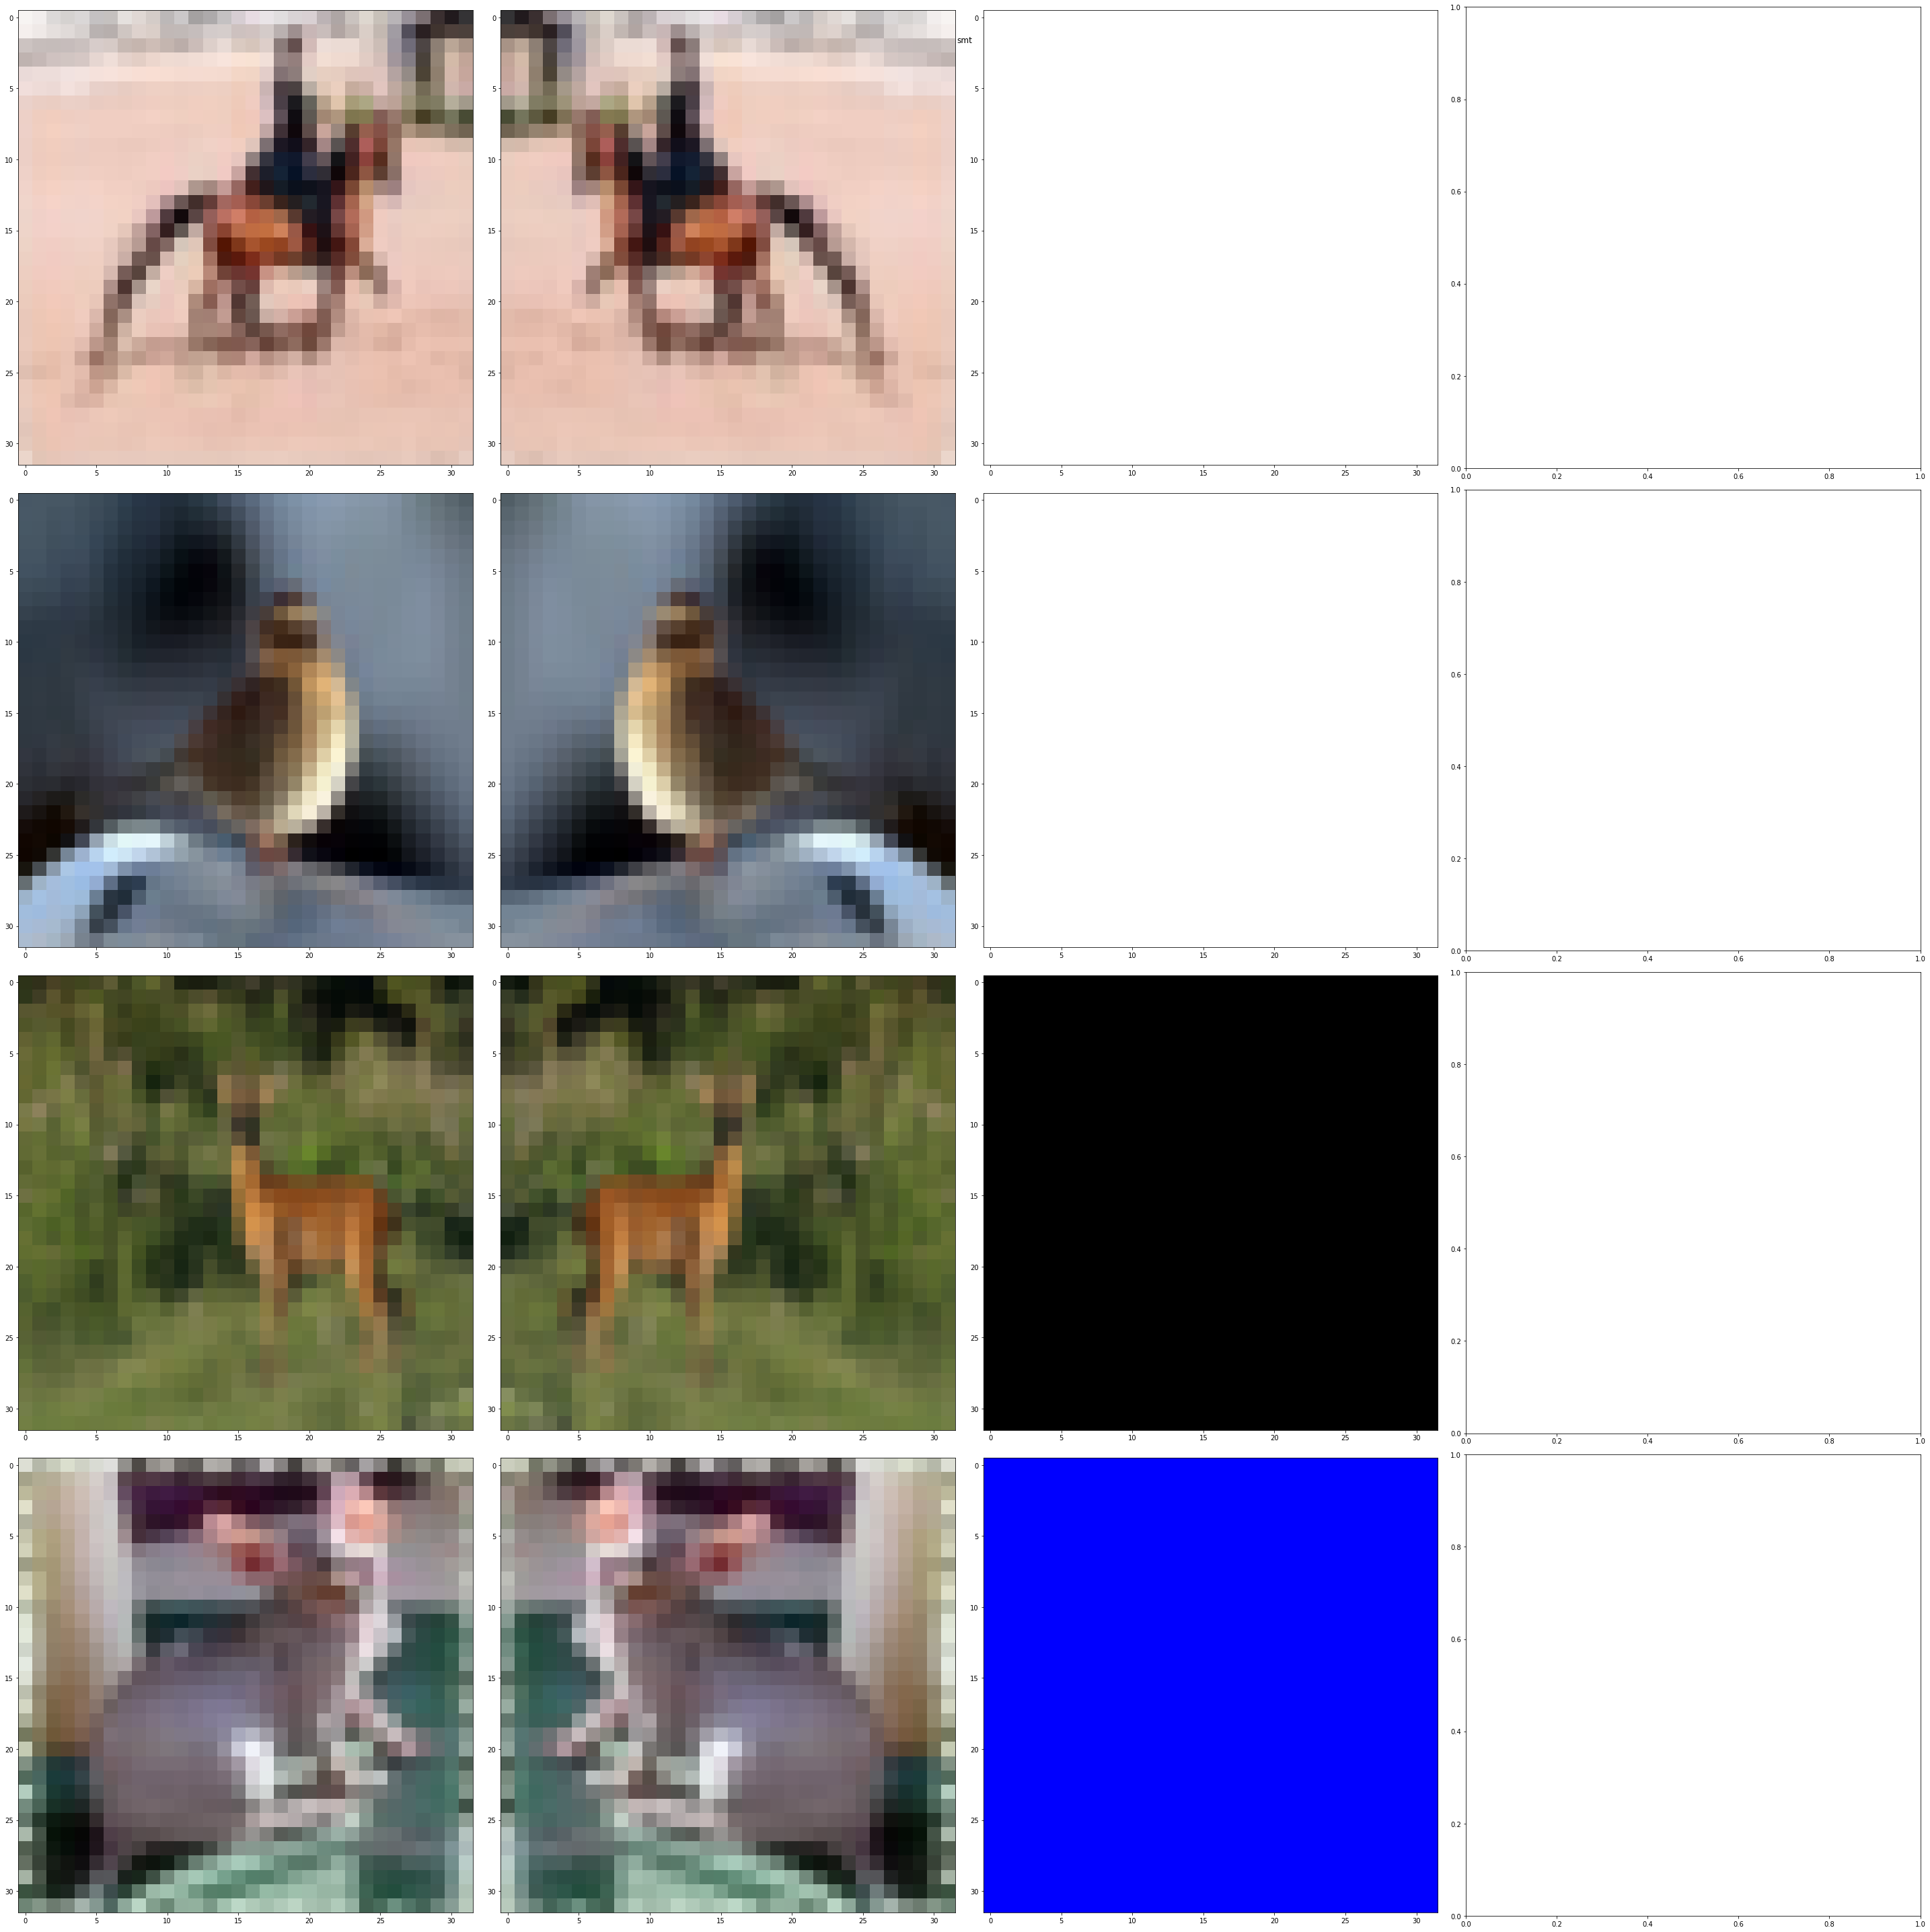

<Figure size 144x144 with 0 Axes>

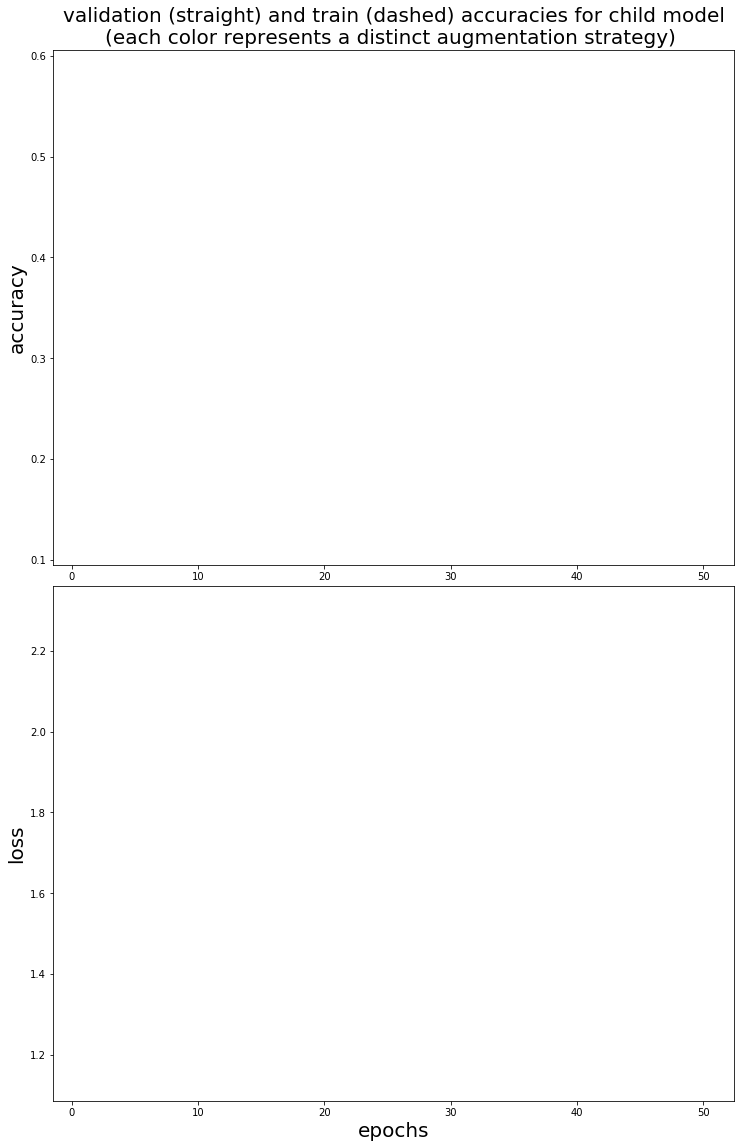

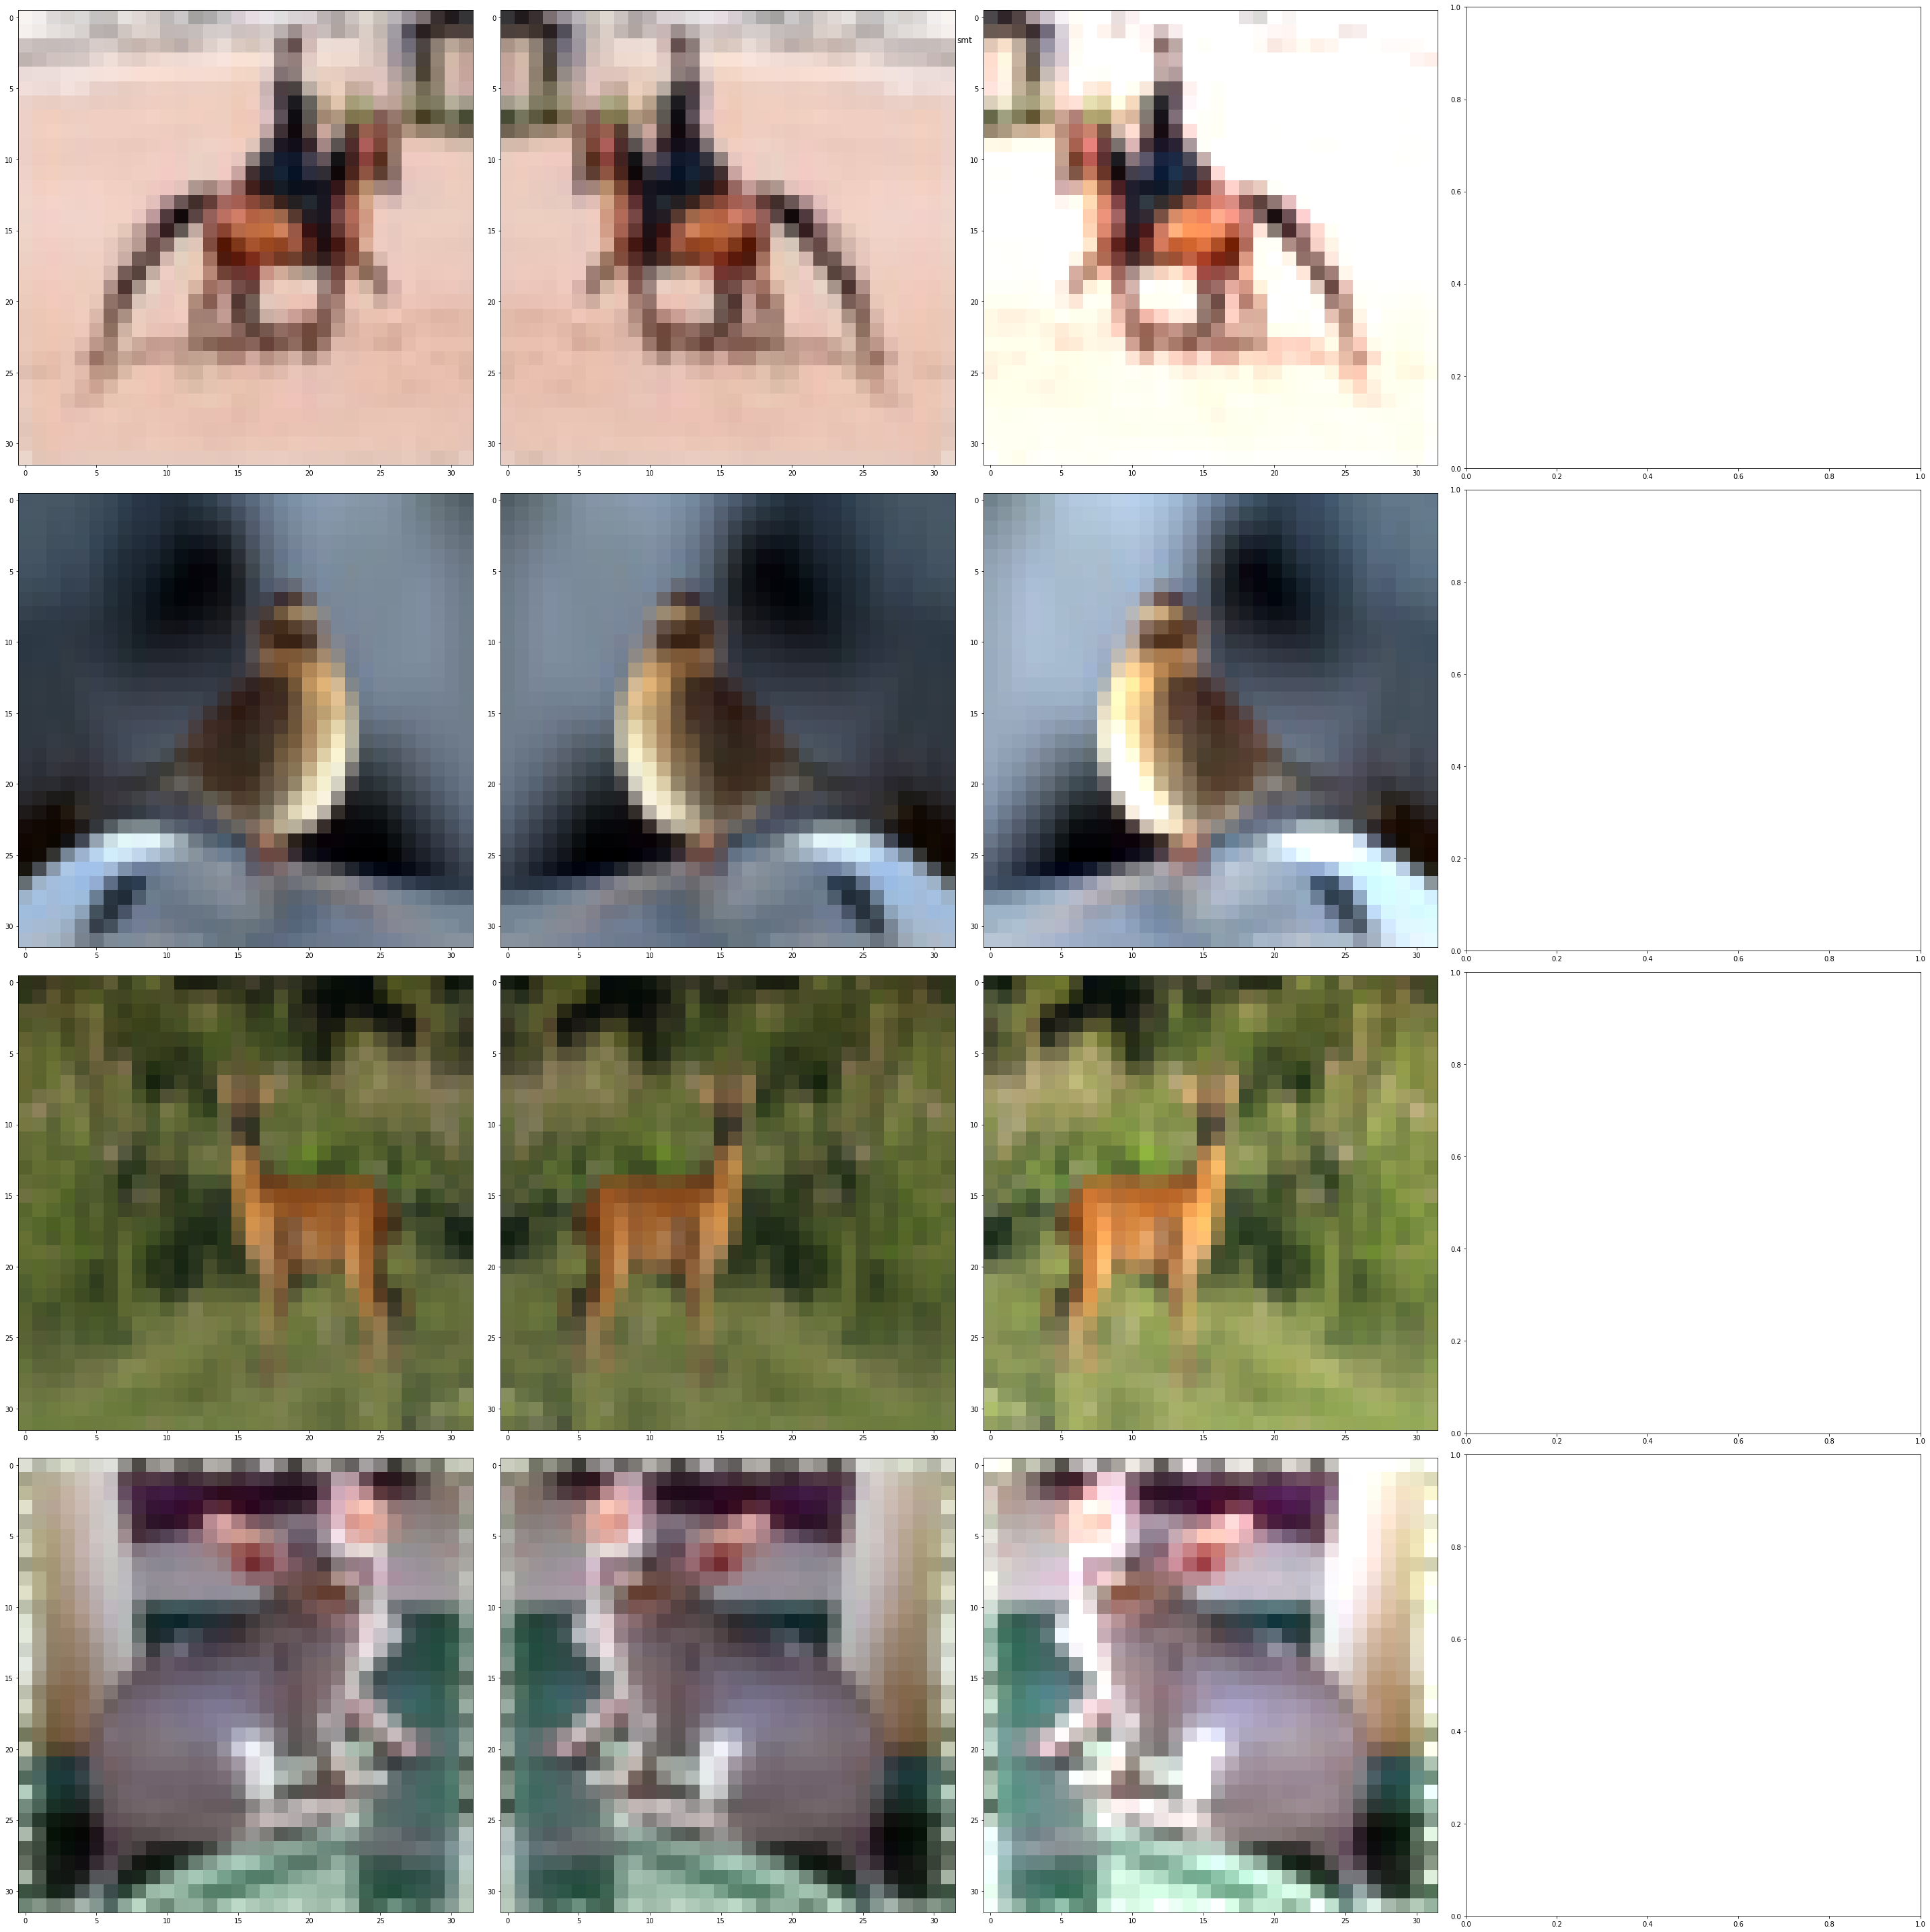

<Figure size 144x144 with 0 Axes>

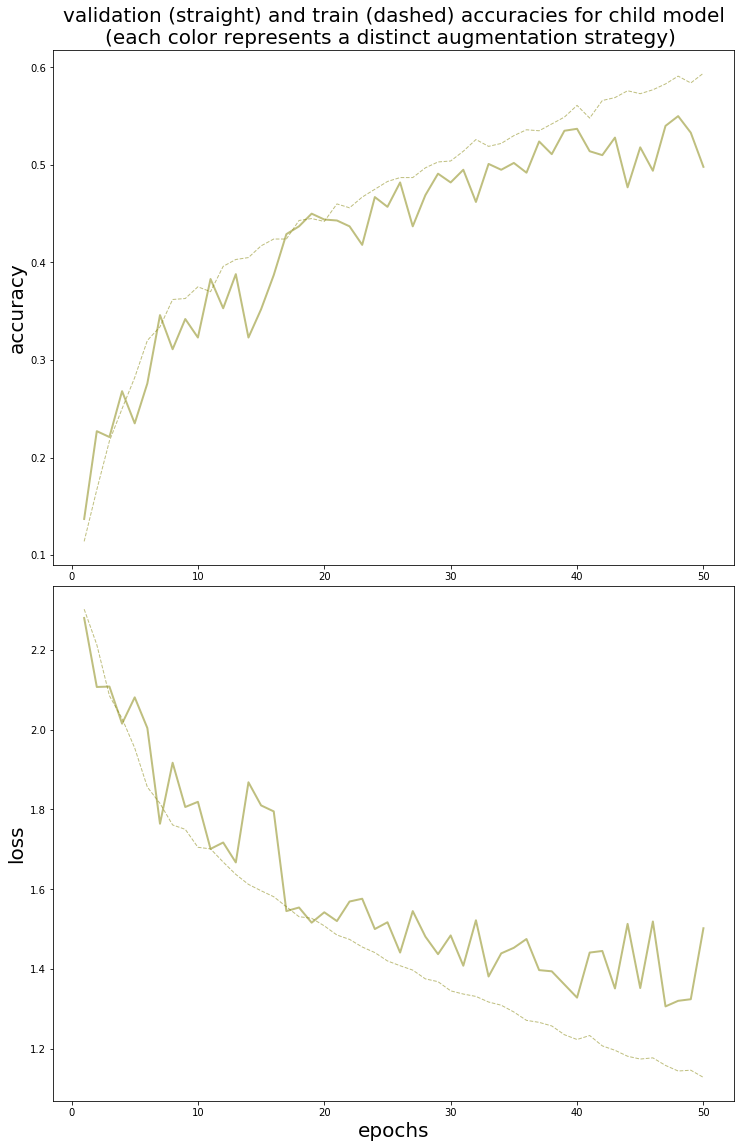

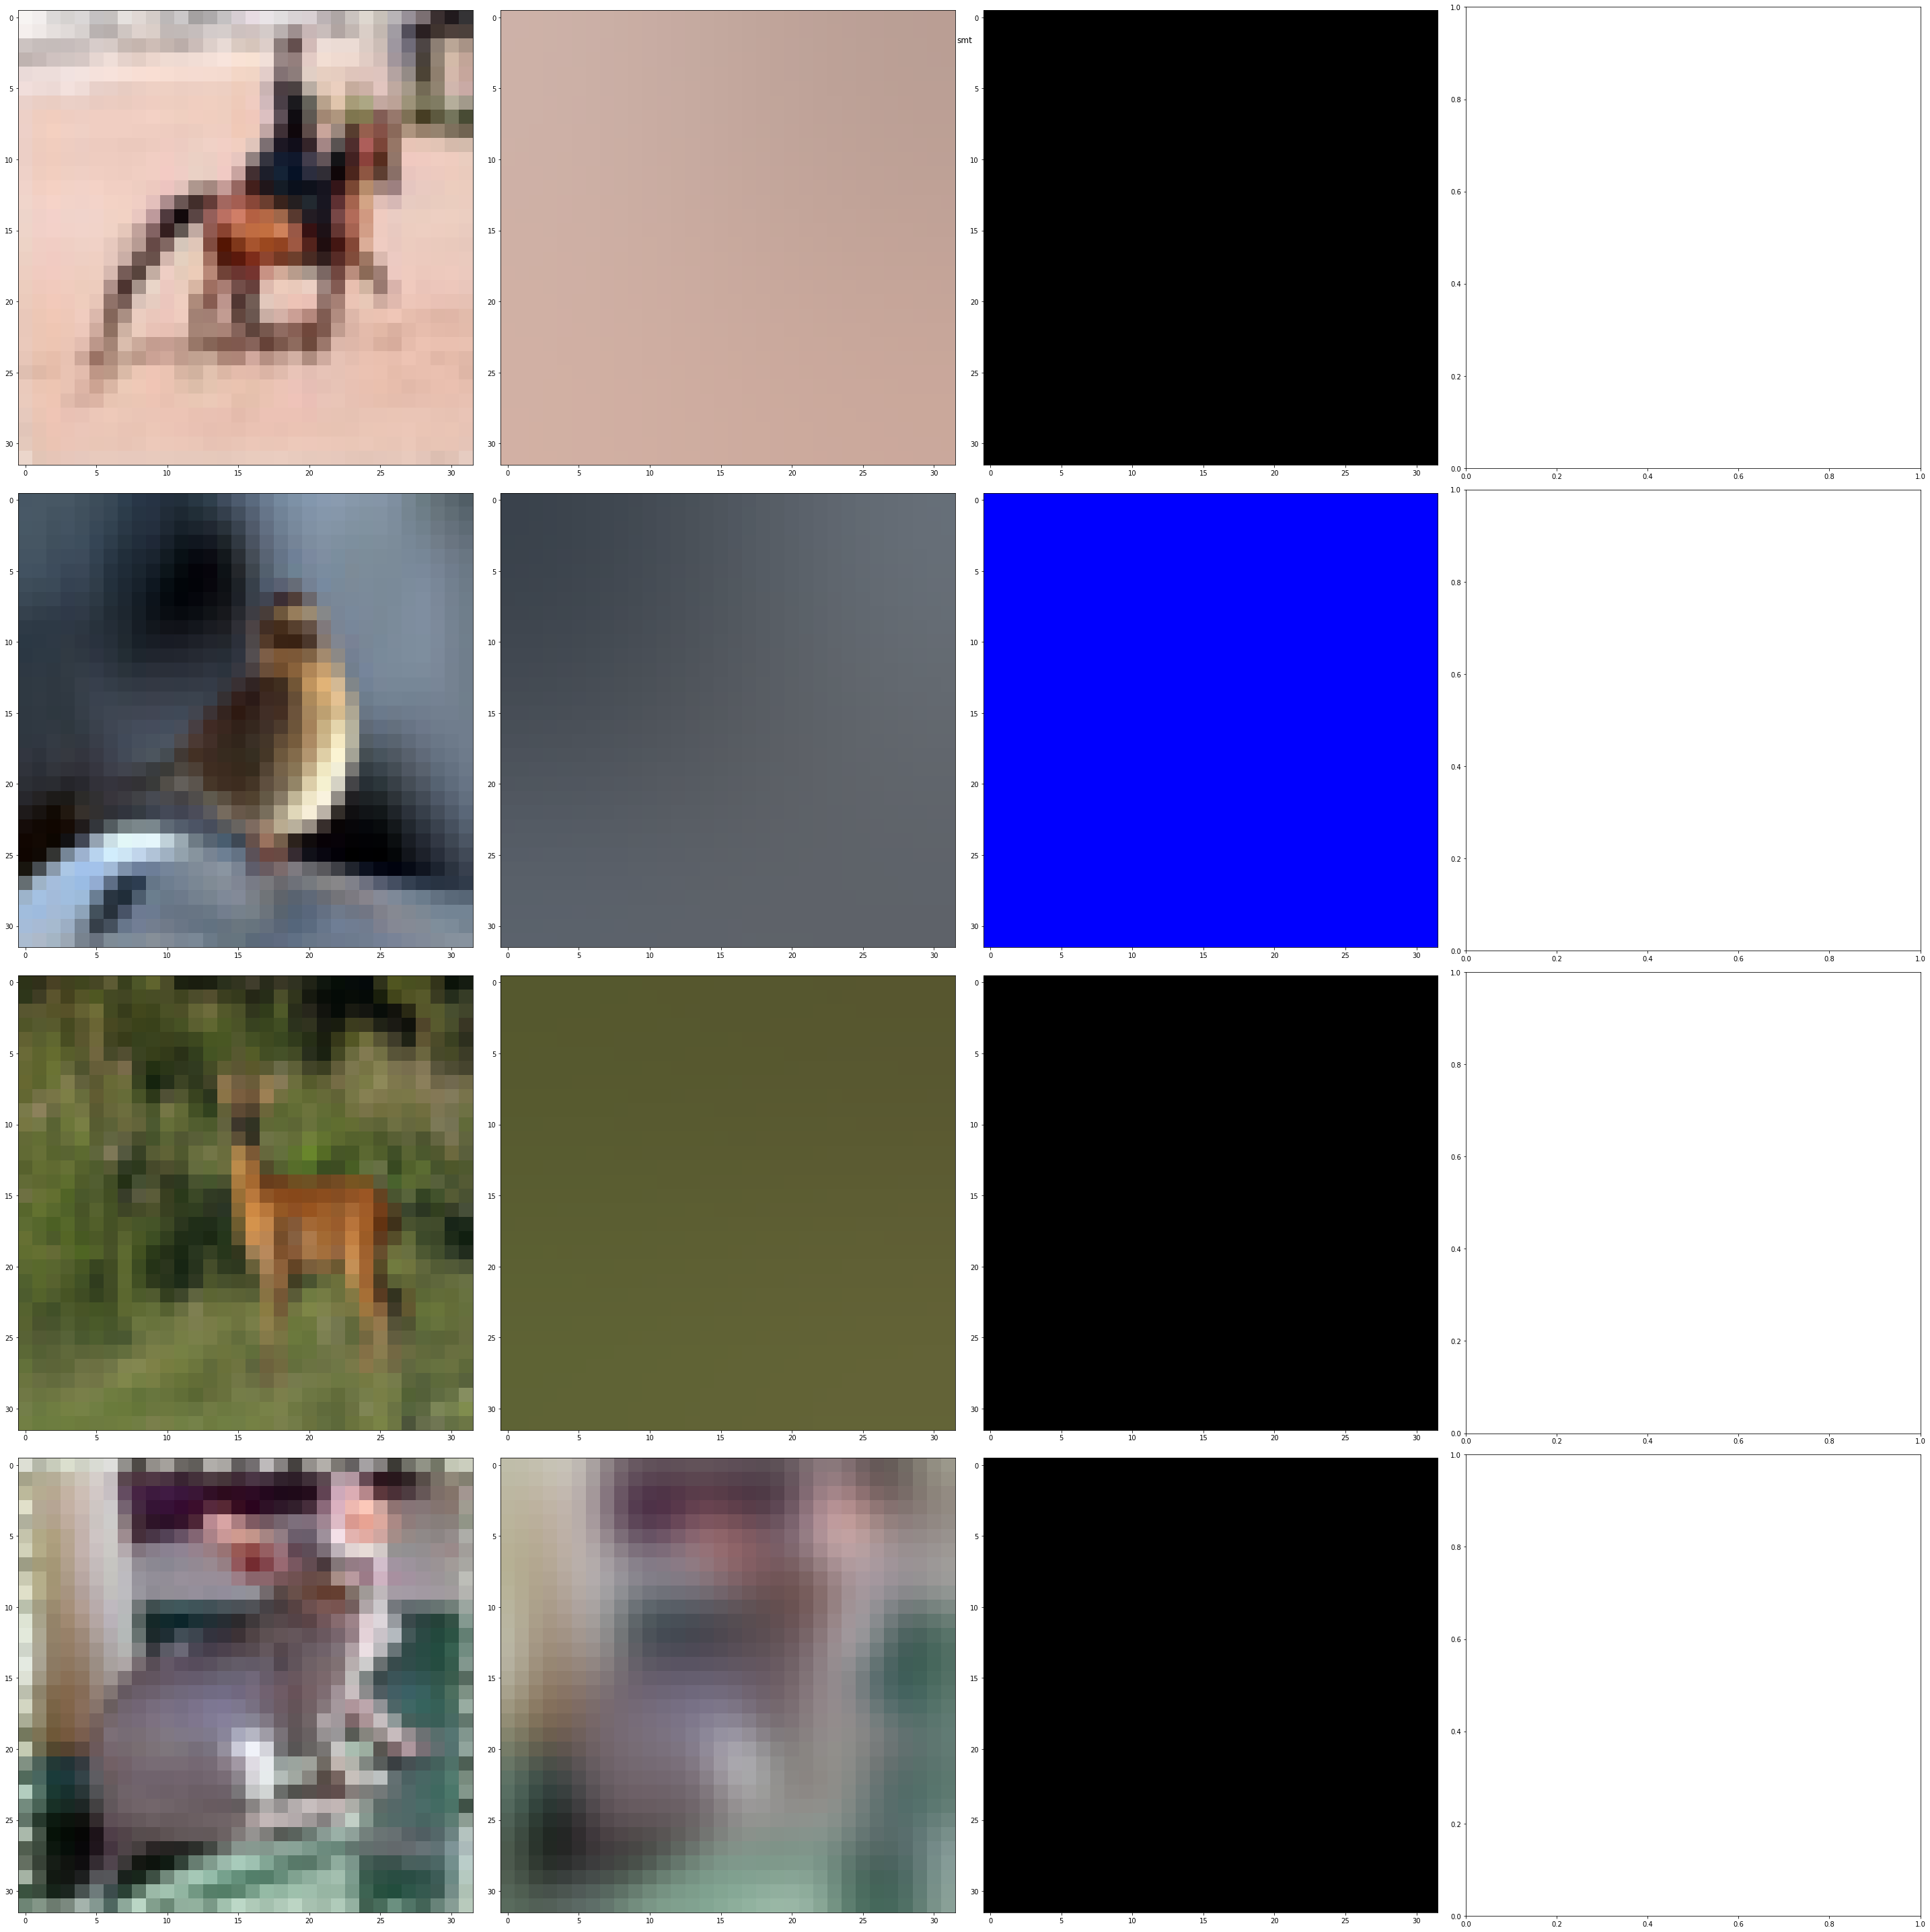

<Figure size 144x144 with 0 Axes>

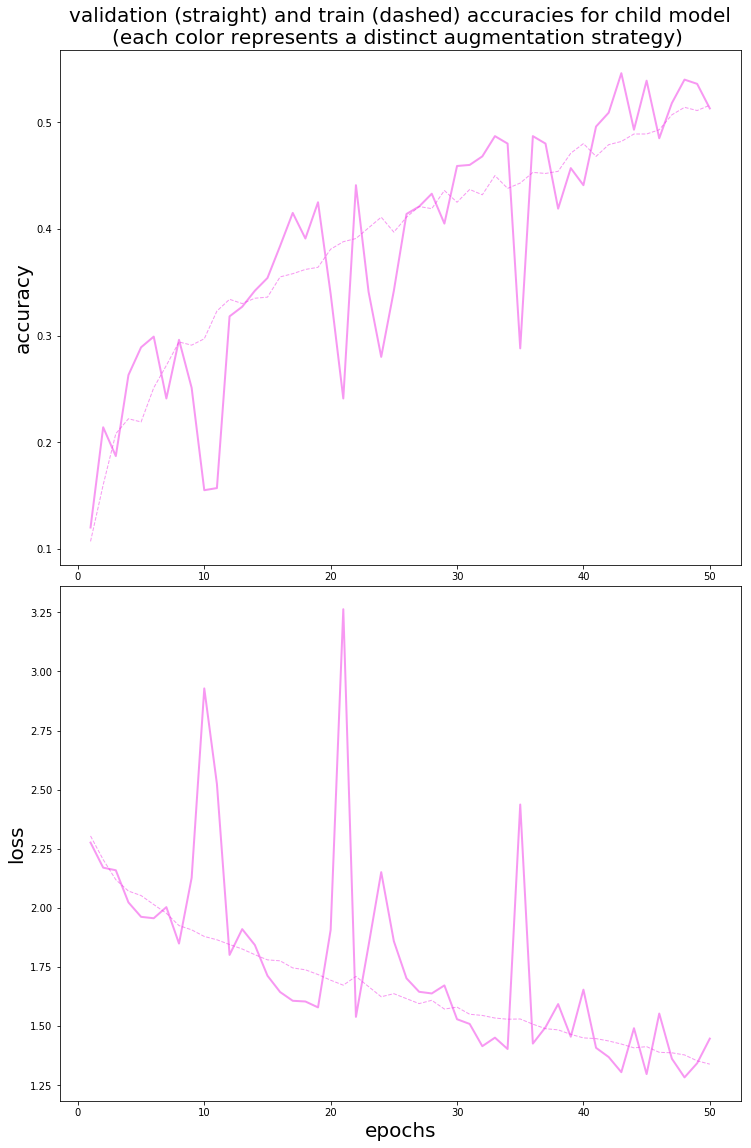

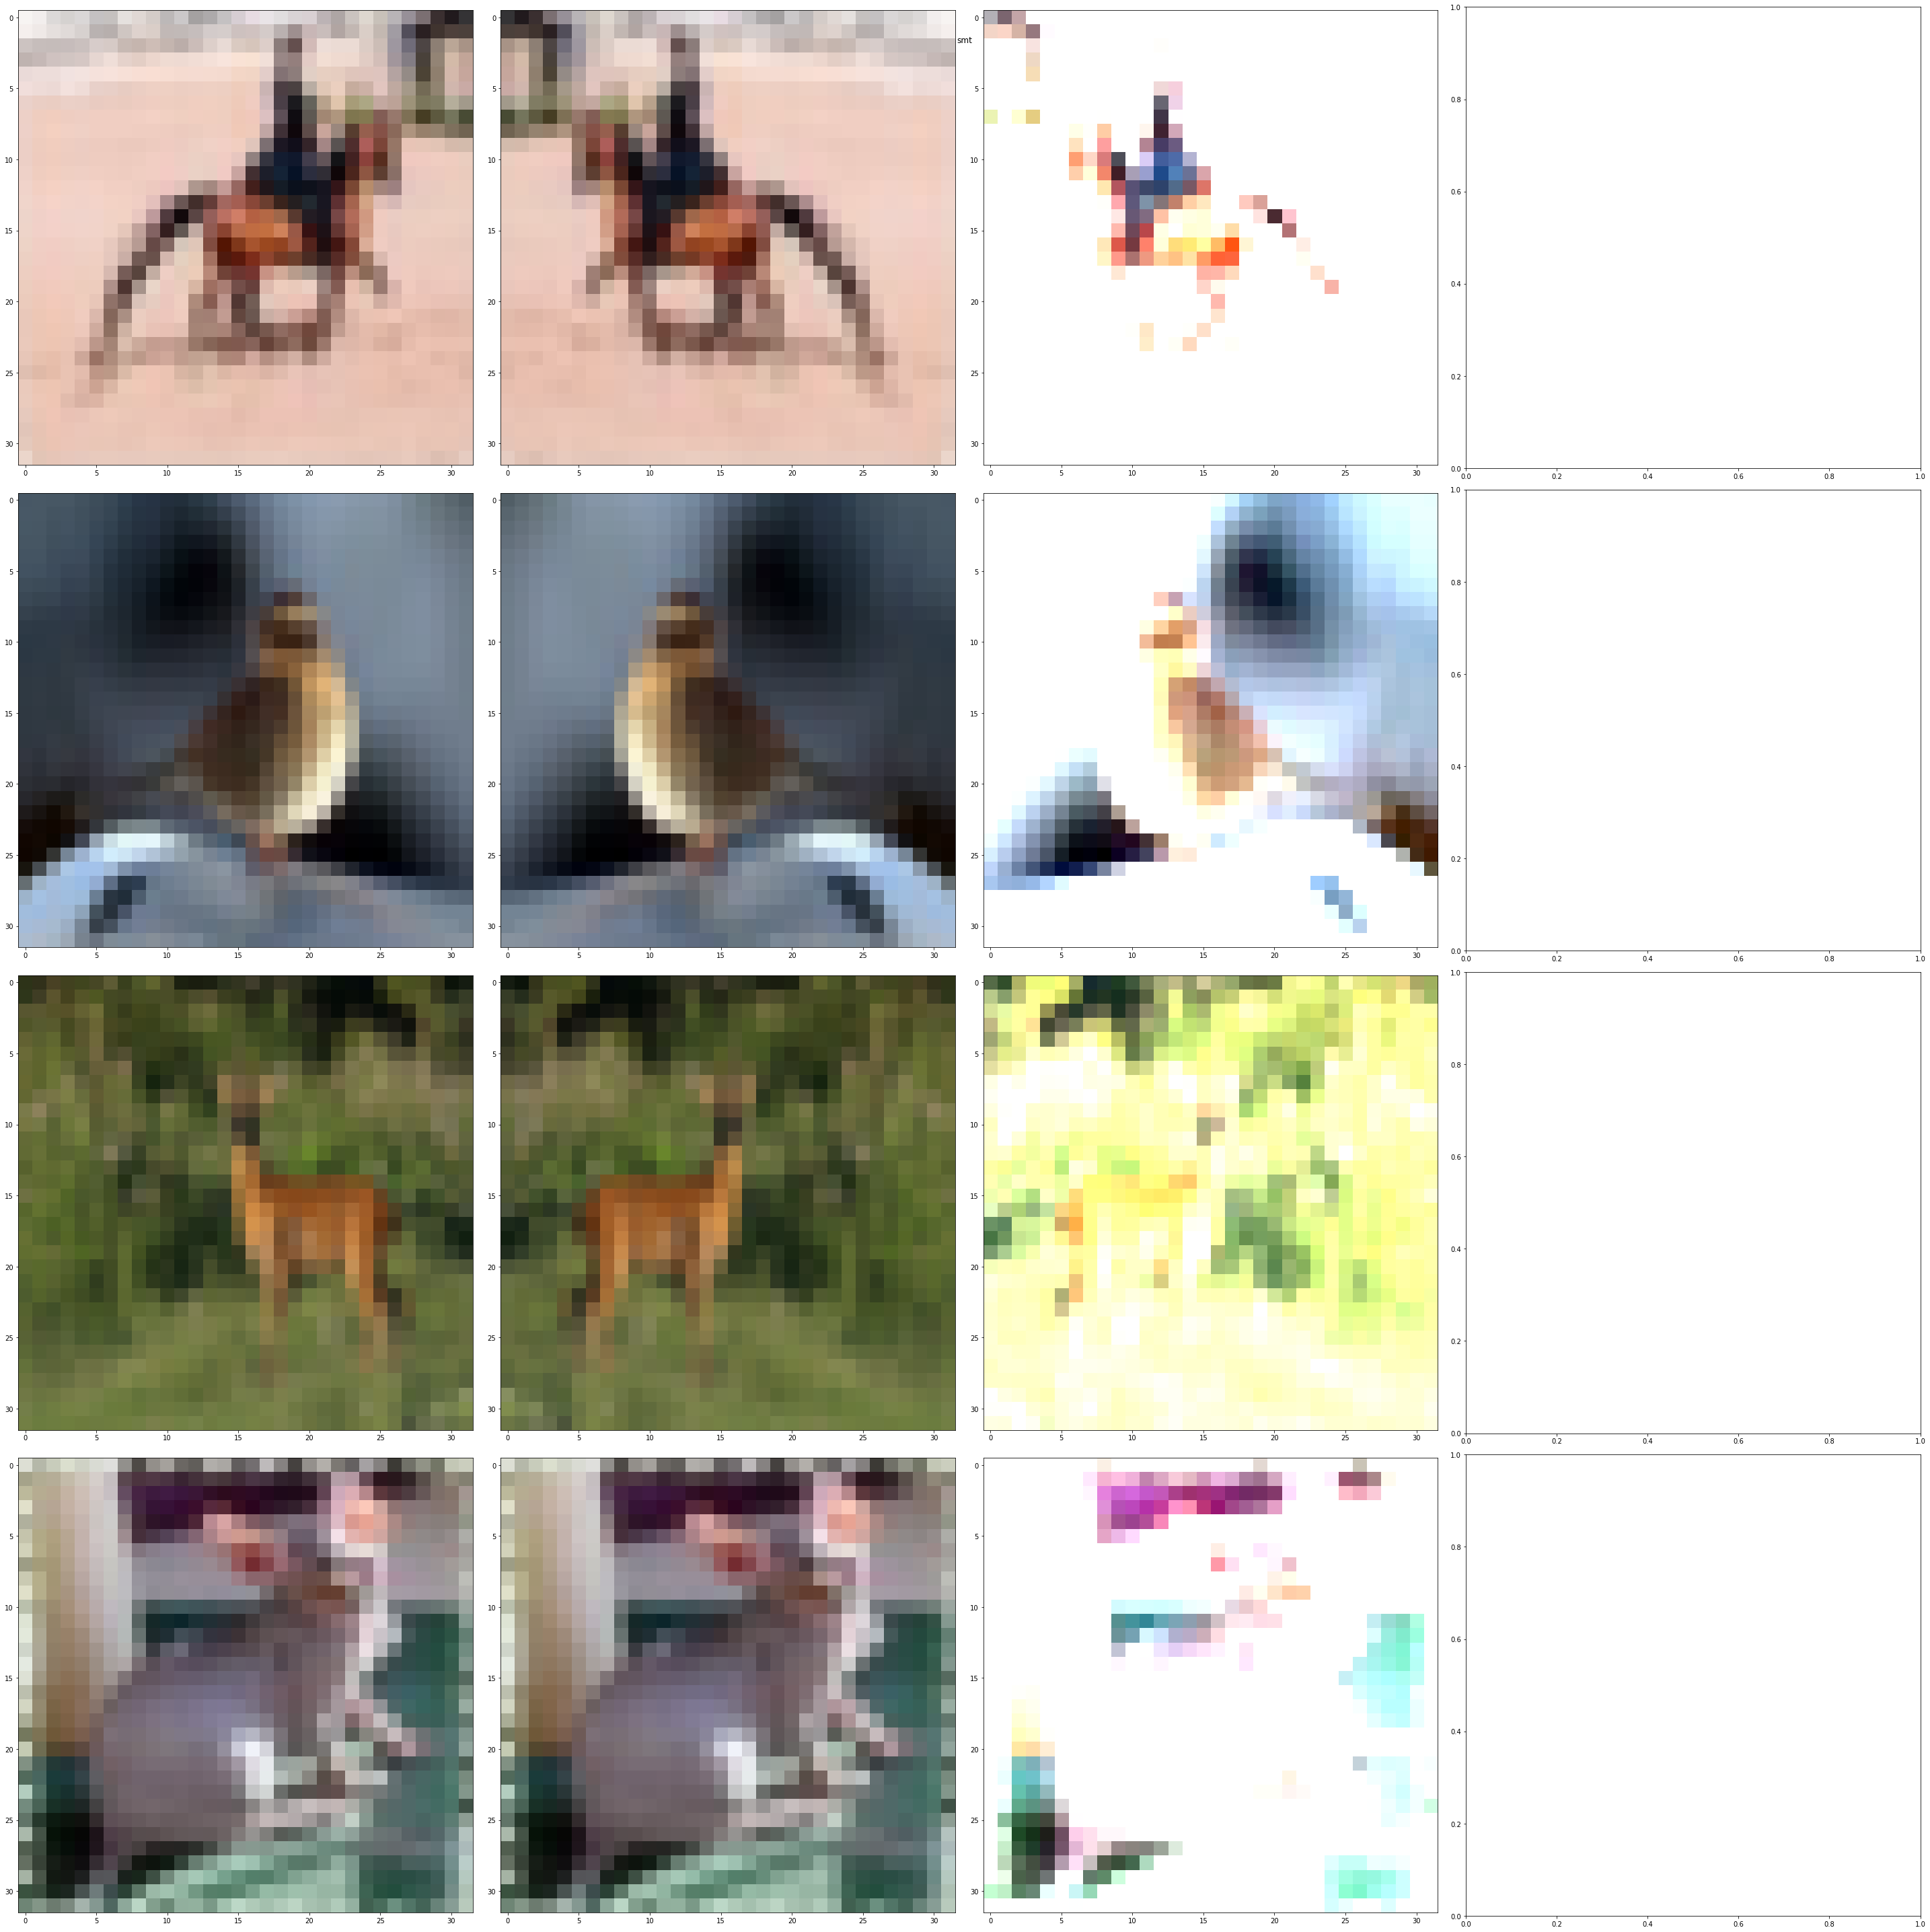

<Figure size 144x144 with 0 Axes>

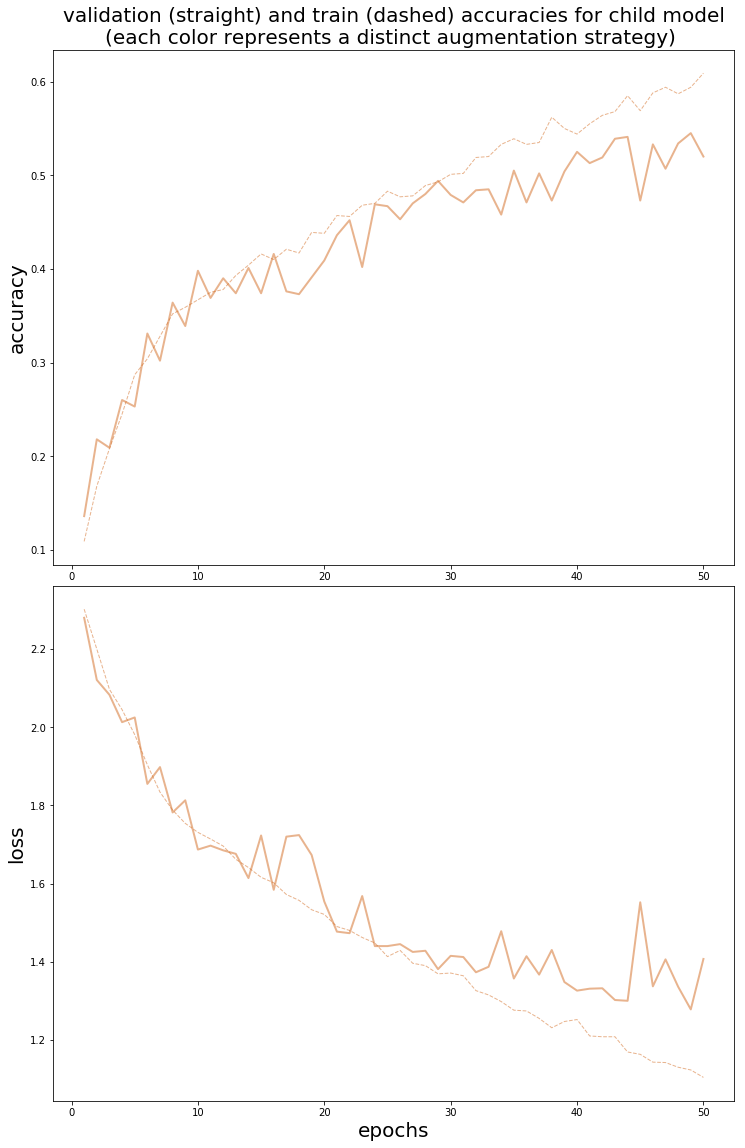

In [23]:
for i in non_overfitting_exp_df.drop_duplicates("trial_no").sort_values("reward", ascending=False).trial_no.values[:5]:
    print ("trial_no:",i)
    display_augmentation_by_steps(i, non_overfitting_exp_df, data, nrows=4)
    # display_augmentation_by_trial_no(i, non_overfitting_exp_df, data, nrows=2, ncols=4)
    plt.figure(figsize=(2,2))
    plot_exp_lines(exp_df[exp_df["trial_no"]==i])

In [34]:
top20_df = (exp_df.drop_duplicates("trial_no")
    .sort_values("reward",ascending=False)
    .drop_duplicates(["aug1_type","aug2_type"]))[:30]

top20_df.to_csv(f"../../top20_policies_cifar10_exp_{EXPERIMENT_NAME}.csv", index=False)


top20_df

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,sample_no,reward,epoch,acc_overfit
55550,0.120,2.290,0.156,2.247,1112,horizontal-flip,0.946,gamma-contrast,0.849,0.968,1,0.582,0.0,-0.036
2950,0.108,2.302,0.150,2.299,60,crop,0.897,invert,0.024,0.619,1,0.564,0.0,-0.042
74200,0.112,2.304,0.125,2.288,1485,horizontal-flip,0.825,horizontal-flip,0.022,0.661,1,0.562,0.0,-0.013
24950,0.105,2.302,0.156,2.279,500,translate-x,0.334,fog,0.462,0.462,1,0.561,0.0,-0.051
3050,0.128,2.278,0.110,2.272,62,crop,0.881,emboss,0.060,0.498,1,0.559,0.0,0.018
33450,0.115,2.296,0.211,2.265,670,horizontal-flip,0.334,crop,0.299,0.440,1,0.558,0.0,-0.096
18450,0.106,2.296,0.150,2.254,370,add-to-hue-and-saturation,0.478,shear,0.195,0.900,1,0.558,0.0,-0.044
50350,0.111,2.298,0.184,2.272,1008,vertical-flip,0.654,shear,0.207,0.916,1,0.558,0.0,-0.073
16500,0.118,2.299,0.185,2.266,331,add-to-hue-and-saturation,0.157,coarse-dropout,0.201,0.986,1,0.554,0.0,-0.067
2500,0.133,2.268,0.205,2.179,51,crop,0.858,translate-x,0.262,1.000,1,0.551,0.0,-0.072


# Top-3 nonoverfitting policies curves

,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,portion,reward
0,1229,horizontal-flip,0.947,translate-y,0.206,0.973,0.546
2,1608,horizontal-flip,0.936,brighten,0.233,0.894,0.545
1,1537,horizontal-flip,0.897,gamma-contrast,0.543,0.897,0.542


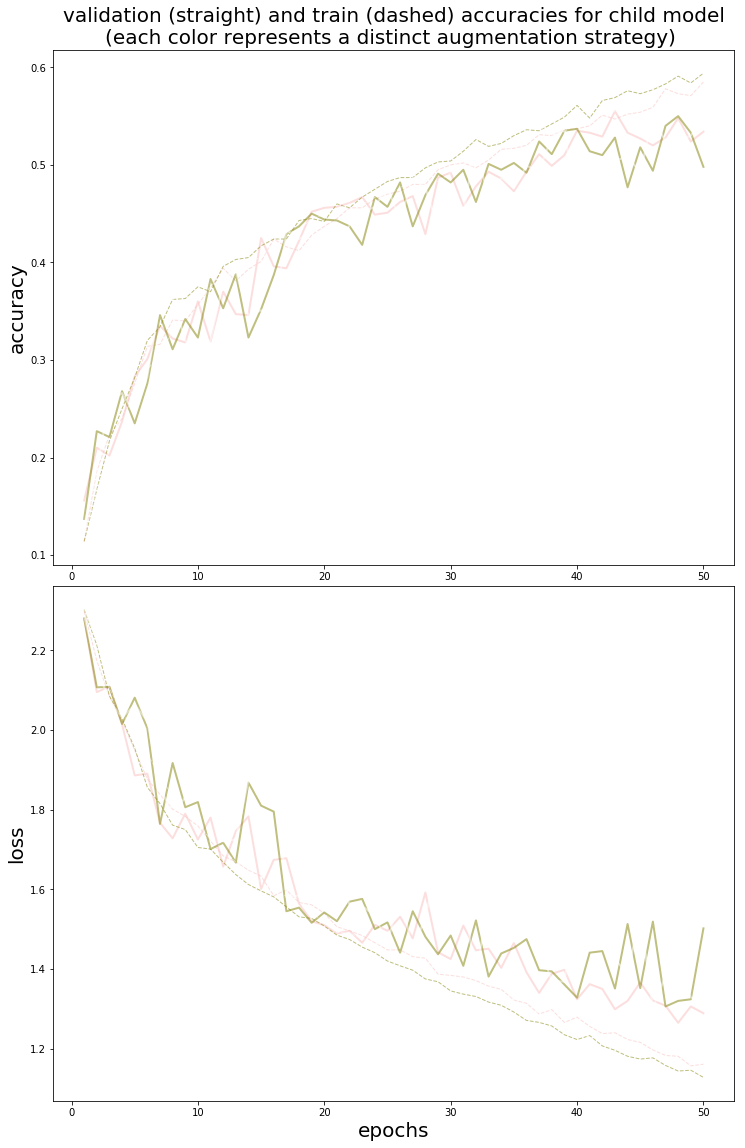

In [25]:
top3_non_overfitting = (non_overfitting_exp_df.drop_duplicates("trial_no")
                            .sort_values("reward",ascending=False)["trial_no"]
                            .values[:3]
                       )

plot_exp_lines(non_overfitting_exp_df[non_overfitting_exp_df["trial_no"].isin(top3_non_overfitting)])

In [26]:
np.array_split(np.arange(8) , 20)

[array([0]),
 array([1]),
 array([2]),
 array([3]),
 array([4]),
 array([5]),
 array([6]),
 array([7]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64)]

In [27]:
rowList=[]
for x in range(len(exp_df["trial_no"].unique())):
    ind = x*50+49
    reward = exp_df.iloc[ind]["reward"]
    val_acc = exp_df.iloc[ind]["val_acc"]
    rowList.append([reward, val_acc])
rv_df = pd.DataFrame(rowList, columns=["reward","val_acc"])
rv_df.head()

,reward,val_acc
0,0.395,0.466
1,0.495,0.540
2,0.472,0.478
3,0.416,0.541
4,0.446,0.480


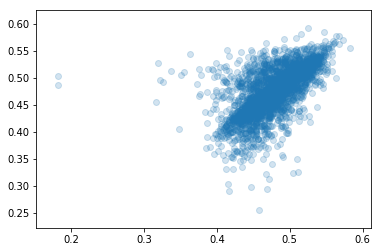

In [35]:
plt.scatter(rv_df["reward"],rv_df["val_acc"], alpha=0.2)

In [36]:
from datascibox.pandas_utilities import 

In [37]:
!pip install deepaugment

    100% |████████████████████████████████| 1.5MB 1.2MB/s ta 0:00:01
    100% |████████████████████████████████| 45.7MB 566kB/s ta 0:00:011
    100% |████████████████████████████████| 71kB 1.1MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 1.9MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 2.0MB/s ta 0:00:011
    100% |████████████████████████████████| 5.3MB 1.5MB/s ta 0:00:011


    100% |████████████████████████████████| 71kB 883kB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/87/89/479dc97e18549e21354893e4ee4ef36db1d237534982482c3681ee6e7b57/mccabe-0.6.1-py2.py3-none-any.whl
    100% |████████████████████████████████| 51kB 2.3MB/s ta 0:00:011
    100% |████████████████████████████████| 81kB 1.7MB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/b7/31/05c8d001f7f87f0f07289a5fc0fc3832e9a57f2dbd4d3b0fee70e0d51365/jmespath-0.9.3-py2.py3-none-any.whl
  Found existing installation: entrypoints 0.2.3
Cannot uninstall 'entrypoints'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [41]:
from deepaugment.bayesianopt import run_bayesianopt

ModuleNotFoundError: No module named 'augmenter'

In [40]:
daug.augmenter

<module 'deepaugment.augmenter' from '../../deepaugment/augmenter.py'>

In [44]:
np.random.rand()

0.6596936126643911

In [48]:
return np.random.choice(["A","B","C"])

'C'

In [80]:
AUG_TYPES = [
    "crop",
    "gaussian-blur",
    "rotate",
    "translate-x",
    "translate-y",
    "sharpen",
    "emboss",
    "additive-gaussian-noise",
    "dropout",
    "coarse-dropout",
    "gamma-contrast",
    "brighten",
    "invert",
    "fog",
    "clouds",
    "add-to-hue-and-saturation",
    "coarse-salt-pepper",
    "horizontal-flip",
    "vertical-flip",
]

def augment_type_chooser():
    return np.random.choice(AUG_TYPES)
    
random_search_space = [
    augment_type_chooser,
    np.random.rand,
    augment_type_chooser,
    np.random.rand,
    np.random.rand
]

In [81]:
random_search_space

[<function __main__.augment_type_chooser()>,
 <function RandomState.rand>,
 <function __main__.augment_type_chooser()>,
 <function RandomState.rand>,
 <function RandomState.rand>]

In [88]:
random_search_space[1]()

0.3220217614933739

In [92]:
def f():
    return [func() for func in random_search_space]

In [96]:
f()

['emboss',
 0.5069019599459277,
 'dropout',
 0.3566422264339044,
 0.7827718979544889]